<a href="https://colab.research.google.com/github/dolmani38/Summary2/blob/main/multi-discriminator%20GAN%200910.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Discriminator GAN


ABSTRACT

----


#4. Implementation


## 4.1 Í∏∞Î≥∏ ÏÑ§Ï†ï...

In [1]:
if True:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#!pip install keybert
!pip3 install transformers
!pip3 install sentence-transformers

#!pip install sentence-transformers

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2.8 MB 5.2 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3.3 MB 51.3 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 636 kB 54.6 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50 kB 7.7 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 895 kB 52.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 85 kB 3.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.2 MB 39.6 MB/s 
  

In [3]:
import matplotlib.pyplot as plt
# set seeds for reproducability
from numpy.random import seed
#seed(1)

import pandas as pd
import numpy as np
import string, os 

import urllib.request
import nltk
nltk.download('punkt')

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


In [5]:
# Print iterations progress
class ProgressBar:

    def __init__(self,total=20, prefix = '', suffix = '', decimals = 1, length = 20, fill = '|', printEnd = "\r"):
        self.total = total
        self.prefix = prefix
        self.suffix = suffix
        self.decimals = decimals
        self.length = length
        self.fill = fill
        self.printEnd = printEnd
        self.ite = 0
        self.back_filledLength = 0

    def printProgress(self,iteration, text):
        self.ite += iteration
        percent = ("{0:." + str(self.decimals) + "f}").format(100 * (self.ite / float(self.total)))
        filledLength = int(self.length * self.ite // self.total)
        bar = self.fill * filledLength + '.' * (self.length - filledLength)
        if filledLength > self.back_filledLength or percent == 100:
            print(f'\r{self.prefix} |{bar}| {percent}% {self.suffix}  {text}', end="", flush=True)
            # Print New Line on Complete
            if self.ite == self.total: 
                print()
        self.back_filledLength = filledLength    

In [6]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms

##4.2 Grammar Discriminator Class

In [7]:
from transformers import BertTokenizer, BertTokenizerFast,AutoTokenizer, BertForSequenceClassification, AdamW, BertConfig, get_linear_schedule_with_warmup
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset, random_split

import time
import random
import datetime
import pickle

# Í∞ÑÎã®Ìïú Ï†ÑÏ≤òÎ¶¨
def clean_text(txt):
    txt = txt.replace('\n',' ')
    txt = txt.replace('\r',' ')    
    txt = txt.replace('=','')
    txt = txt.replace('\"','')   
    txt = txt.replace('\'','')
    #txt = txt.replace(',','')
    txt = txt.replace('..','')
    txt = txt.replace('...','')
    txt = txt.replace(' .','.')
    txt = txt.replace('.','. ')
    txt = txt.replace('  ',' ')
    txt = txt.replace('  ',' ')    
    txt = txt.replace('  ',' ')   
    txt = txt.replace('  ',' ')           
    txt = txt.replace('  ',' ')
    txt = txt.replace('  ',' ')    
    txt = txt.replace('  ',' ')   
    txt = txt.replace('  ',' ')             
    return txt.strip()

def shuffling(txt):
    txt_list = txt.split(' ')
    random.shuffle(txt_list)
    return ' '.join(txt_list)

def collect_training_dataset_for_grammar_discriminator(sentences_dataset):

    sentences = []
    labels = []

    for txtss in sentences_dataset:
        txtss = clean_text(txtss)
        txts = txtss.strip().split('.')
        for txt in txts:  
            txt = txt.strip()
            if len(txt) > 10:
                #ko_grammar_dataset.append([txt,1])
                txt = txt.replace('.','')
                tf = random.choice([True,False])
                # Ï†ïÏÉÅ ÎòêÎäî ÎπÑÏ†ïÏÉÅ ÎëòÏ§ëÏóê ÌïòÎÇòÎßå Îç∞Ïù¥ÌÑ∞ÏÖãÏóê Ï∂îÍ∞Ä
                if (tf):
                    sentences.append(txt) # '.'Ïùò ÏúÑÏπòÎ•º Î≥¥Í≥† True, FalseÎ•º ÌåêÎã® ÌïòÍ∏∞ ÎïúÏóê...
                    labels.append(1)
                else:
                    sentences.append(shuffling(txt))
                    labels.append(0)

    return sentences,labels

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

class Grammar_Discriminator:


    def __init__(self, pretraoned_kobert_model_name='kykim/bert-kor-base', input_dir=None):

        if input_dir is None:
            self.tokenizer = BertTokenizerFast.from_pretrained(pretraoned_kobert_model_name)
            self.discriminator = BertForSequenceClassification.from_pretrained(
                                    pretraoned_kobert_model_name, # Use the 12-layer BERT model, with an uncased vocab.
                                    num_labels = 2, # The number of output labels--2 for binary classification.
                                                    # You can increase this for multi-class tasks.   
                                    output_attentions = False, # Whether the model returns attentions weights.
                                    output_hidden_states = False, # Whether the model returns all hidden-states.
                                )            
        else:
            self.__load_model(input_dir)




    def set_dataset(self, sentences,labels):
        # Print the original sentence.
        print(' Original: ', sentences[0])

        # Tokenize all of the sentences and map the tokens to thier word IDs.
        input_ids = []
        attention_masks = []

        # For every sentence...
        for i, sent in enumerate(sentences):
            print(f'\r Tokenize {i+1}/{len(sentences)}', end="", flush=True)            
            # `encode_plus` will:
            #   (1) Tokenize the sentence.
            #   (2) Prepend the `[CLS]` token to the start.
            #   (3) Append the `[SEP]` token to the end.
            #   (4) Map tokens to their IDs.
            #   (5) Pad or truncate the sentence to `max_length`
            #   (6) Create attention masks for [PAD] tokens.
            encoded_dict = self.tokenizer.encode_plus(
                                sent,                      # Sentence to encode.
                                add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                                max_length = 64,           # Pad & truncate all sentences.
                                pad_to_max_length = True,
                                return_attention_mask = True,   # Construct attn. masks.
                                return_tensors = 'pt',     # Return pytorch tensors.
                                truncation = True,
                        )
            
            # Add the encoded sentence to the list.    
            input_ids.append(encoded_dict['input_ids'])
            
            # And its attention mask (simply differentiates padding from non-padding).
            attention_masks.append(encoded_dict['attention_mask'])

        # Convert the lists into tensors.
        input_ids = torch.cat(input_ids, dim=0)
        attention_masks = torch.cat(attention_masks, dim=0)
        labels = torch.tensor(labels)

        # Print sentence 0, now as a list of IDs.
        print('Original: ', sentences[0])
        print('Token IDs:', input_ids[0])

        # Training & Validation Split
        # Divide up our training set to use 90% for training and 10% for validation.

        # Combine the training inputs into a TensorDataset.
        dataset = TensorDataset(input_ids, attention_masks, labels)

        # Create a 90-10 train-validation split.

        # Calculate the number of samples to include in each set.
        train_size = int(0.9 * len(dataset))
        val_size = len(dataset) - train_size

        # Divide the dataset by randomly selecting samples.
        train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

        print('{:>5,} training samples'.format(train_size))
        print('{:>5,} validation samples'.format(val_size))

        # The DataLoader needs to know our batch size for training, so we specify it 
        # here. For fine-tuning BERT on a specific task, the authors recommend a batch 
        # size of 16 or 32.
        self.batch_size = 32

        # Create the DataLoaders for our training and validation sets.
        # We'll take training samples in random order. 
        self.train_dataloader = DataLoader(
                    train_dataset,  # The training samples.
                    sampler = RandomSampler(train_dataset), # Select batches randomly
                    batch_size = self.batch_size # Trains with this batch size.
                )

        # For validation the order doesn't matter, so we'll just read them sequentially.
        self.validation_dataloader = DataLoader(
                    val_dataset, # The validation samples.
                    sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
                    batch_size = self.batch_size # Evaluate with this batch size.
                )        


    def train(self,epochs=4):
        # Tell pytorch to run this model on the GPU.
        self.discriminator.cuda()

        # Get all of the model's parameters as a list of tuples.
        params = list(self.discriminator.named_parameters())

        print('The BERT model has {:} different named parameters.\n'.format(len(params)))

        print('==== Embedding Layer ====\n')

        for p in params[0:5]:
            print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

        print('\n==== First Transformer ====\n')

        for p in params[5:21]:
            print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

        print('\n==== Output Layer ====\n')

        for p in params[-4:]:
            print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))  

        # Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
        # I believe the 'W' stands for 'Weight Decay fix"
        self.optimizer = AdamW(self.discriminator.parameters(),
                        lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                        eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                        )

        # Number of training epochs. The BERT authors recommend between 2 and 4. 
        # We chose to run for 4, but we'll see later that this may be over-fitting the
        # training data.
        #epochs = 2

        # Total number of training steps is [number of batches] x [number of epochs]. 
        # (Note that this is not the same as the number of training samples).
        total_steps = len(self.train_dataloader) * epochs

        # Create the learning rate scheduler.
        scheduler = get_linear_schedule_with_warmup(self.optimizer, 
                                                    num_warmup_steps = 0, # Default value in run_glue.py
                                                    num_training_steps = total_steps)
            
        # This training code is based on the `run_glue.py` script here:
        # https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

        # Set the seed value all over the place to make this reproducible.
        seed_val = 42

        random.seed(seed_val)
        np.random.seed(seed_val)
        torch.manual_seed(seed_val)
        torch.cuda.manual_seed_all(seed_val)

        # We'll store a number of quantities such as training and validation loss, 
        # validation accuracy, and timings.
        training_stats = []

        # Measure the total training time for the whole run.
        total_t0 = time.time()

        # For each epoch...
        for epoch_i in range(0, epochs):
            
            # ========================================
            #               Training
            # ========================================
            
            # Perform one full pass over the training set.

            print("")
            print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
            print('Training...')

            # Measure how long the training epoch takes.
            t0 = time.time()

            # Reset the total loss for this epoch.
            total_train_loss = 0

            # Put the model into training mode. Don't be mislead--the call to 
            # `train` just changes the *mode*, it doesn't *perform* the training.
            # `dropout` and `batchnorm` layers behave differently during training
            # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
            self.discriminator.train()

            # For each batch of training data...
            for step, batch in enumerate(self.train_dataloader):

                # Progress update every 40 batches.
                if step % 40 == 0 and not step == 0:
                    # Calculate elapsed time in minutes.
                    elapsed = format_time(time.time() - t0)
                    
                    # Report progress.
                    print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(self.train_dataloader), elapsed))

                # Unpack this training batch from our dataloader. 
                #
                # As we unpack the batch, we'll also copy each tensor to the GPU using the 
                # `to` method.
                #
                # `batch` contains three pytorch tensors:
                #   [0]: input ids 
                #   [1]: attention masks
                #   [2]: labels 
                b_input_ids = batch[0].to(device)
                b_input_mask = batch[1].to(device)
                b_labels = batch[2].to(device)

                # Always clear any previously calculated gradients before performing a
                # backward pass. PyTorch doesn't do this automatically because 
                # accumulating the gradients is "convenient while training RNNs". 
                # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
                self.discriminator.zero_grad()        

                # Perform a forward pass (evaluate the model on this training batch).
                # The documentation for this `model` function is here: 
                # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
                # It returns different numbers of parameters depending on what arguments
                # arge given and what flags are set. For our useage here, it returns
                # the loss (because we provided labels) and the "logits"--the model
                # outputs prior to activation.
                outputs = self.discriminator(b_input_ids, 
                                    token_type_ids=None, 
                                    attention_mask=b_input_mask, 
                                    labels=b_labels)
                loss, logits = outputs.loss, outputs.logits
                # Accumulate the training loss over all of the batches so that we can
                # calculate the average loss at the end. `loss` is a Tensor containing a
                # single value; the `.item()` function just returns the Python value 
                # from the tensor.
                total_train_loss += loss.item()

                # Perform a backward pass to calculate the gradients.
                loss.backward()

                # Clip the norm of the gradients to 1.0.
                # This is to help prevent the "exploding gradients" problem.
                torch.nn.utils.clip_grad_norm_(self.discriminator.parameters(), 1.0)

                # Update parameters and take a step using the computed gradient.
                # The optimizer dictates the "update rule"--how the parameters are
                # modified based on their gradients, the learning rate, etc.
                self.optimizer.step()

                # Update the learning rate.
                scheduler.step()

            # Calculate the average loss over all of the batches.
            avg_train_loss = total_train_loss / len(self.train_dataloader)            
            
            # Measure how long this epoch took.
            training_time = format_time(time.time() - t0)

            print("")
            print("  Average training loss: {0:.2f}".format(avg_train_loss))
            print("  Training epcoh took: {:}".format(training_time))
                
            # ========================================
            #               Validation
            # ========================================
            # After the completion of each training epoch, measure our performance on
            # our validation set.

            print("")
            print("Running Validation...")

            t0 = time.time()

            # Put the model in evaluation mode--the dropout layers behave differently
            # during evaluation.
            self.discriminator.eval()

            # Tracking variables 
            total_eval_accuracy = 0
            total_eval_loss = 0
            nb_eval_steps = 0

            # Evaluate data for one epoch
            for batch in self.validation_dataloader:
                
                # Unpack this training batch from our dataloader. 
                #
                # As we unpack the batch, we'll also copy each tensor to the GPU using 
                # the `to` method.
                #
                # `batch` contains three pytorch tensors:
                #   [0]: input ids 
                #   [1]: attention masks
                #   [2]: labels 
                b_input_ids = batch[0].to(device)
                b_input_mask = batch[1].to(device)
                b_labels = batch[2].to(device)
                
                # Tell pytorch not to bother with constructing the compute graph during
                # the forward pass, since this is only needed for backprop (training).
                with torch.no_grad():        

                    # Forward pass, calculate logit predictions.
                    # token_type_ids is the same as the "segment ids", which 
                    # differentiates sentence 1 and 2 in 2-sentence tasks.
                    # The documentation for this `model` function is here: 
                    # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
                    # Get the "logits" output by the model. The "logits" are the output
                    # values prior to applying an activation function like the softmax.
                    outputs = self.discriminator(b_input_ids, 
                                        token_type_ids=None, 
                                        attention_mask=b_input_mask,
                                        labels=b_labels)
                loss, logits = outputs.loss, outputs.logits
                # Accumulate the validation loss.
                total_eval_loss += loss.item()

                # Move logits and labels to CPU
                logits = logits.detach().cpu().numpy()
                label_ids = b_labels.to('cpu').numpy()

                # Calculate the accuracy for this batch of test sentences, and
                # accumulate it over all batches.
                total_eval_accuracy += flat_accuracy(logits, label_ids)
                

            # Report the final accuracy for this validation run.
            avg_val_accuracy = total_eval_accuracy / len(self.validation_dataloader)
            print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

            # Calculate the average loss over all of the batches.
            avg_val_loss = total_eval_loss / len(self.validation_dataloader)
            
            # Measure how long the validation run took.
            validation_time = format_time(time.time() - t0)
            
            print("  Validation Loss: {0:.2f}".format(avg_val_loss))
            print("  Validation took: {:}".format(validation_time))

            # Record all statistics from this epoch.
            training_stats.append(
                {
                    'epoch': epoch_i + 1,
                    'Training Loss': avg_train_loss,
                    'Valid. Loss': avg_val_loss,
                    'Valid. Accur.': avg_val_accuracy,
                    'Training Time': training_time,
                    'Validation Time': validation_time
                }
            )

        print("")
        print("Training complete!")

        print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))
            

        return training_stats

    def save_model(self, output_dir = './model_save/'):
        # Create output directory if needed
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

        print("Saving model to %s" % output_dir)

        # Save a trained model, configuration and tokenizer using `save_pretrained()`.
        # They can then be reloaded using `from_pretrained()`
        model_to_save = self.discriminator.module if hasattr(self.discriminator, 'module') else self.discriminator  # Take care of distributed/parallel training
        model_to_save.save_pretrained(output_dir)
        self.tokenizer.save_pretrained(output_dir)

        # Good practice: save your training arguments together with the trained model
        # torch.save(args, os.path.join(output_dir, 'training_args.bin'))

    def __load_model(self, input_dir = './drive/MyDrive/Colab Notebooks/summary/en_grammar_check_model'):
        print('Loading BERT tokenizer...')
        self.tokenizer = BertTokenizerFast.from_pretrained(input_dir)
        self.discriminator = BertForSequenceClassification.from_pretrained(input_dir)

    def transfer_learning(self, sentences, train_for = True):
        
        input_ids = []
        attention_masks = []

        # For every sentence...
        for sent in sentences:
            # `encode_plus` will:
            #   (1) Tokenize the sentence.
            #   (2) Prepend the `[CLS]` token to the start.
            #   (3) Append the `[SEP]` token to the end.
            #   (4) Map tokens to their IDs.
            #   (5) Pad or truncate the sentence to `max_length`
            #   (6) Create attention masks for [PAD] tokens.
            encoded_dict = self.tokenizer.encode_plus(
                                sent,                      # Sentence to encode.
                                add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                                max_length = 64,           # Pad & truncate all sentences.
                                pad_to_max_length = True,
                                return_attention_mask = True,   # Construct attn. masks.
                                return_tensors = 'pt',     # Return pytorch tensors.
                                truncation = True,
                        )
            # Add the encoded sentence to the list.    
            input_ids.append(encoded_dict['input_ids'])

            # And its attention mask (simply differentiates padding from non-padding).
            attention_masks.append(encoded_dict['attention_mask'])
        
        if train_for:
            b_labels = torch.ones(len(sentences),dtype=torch.long).to(device)
        else:
            b_labels = torch.zeros(len(sentences),dtype=torch.long).to(device)
        #print(b_labels)
        # Convert the lists into tensors.
        input_ids = torch.cat(input_ids, dim=0).to(device)
        attention_masks = torch.cat(attention_masks, dim=0).to(device)    
        #if str(discriminator1.device) == 'cpu':
        #    pass
        #else:
        #    input_ids = input_ids.to(device)
        #    attention_masks = attention_masks.to(device)        

        outputs = self.discriminator(input_ids, 
                            token_type_ids=None, 
                            attention_mask=attention_masks, 
                                labels=b_labels)

        #print(outputs)
        #return torch.sigmoid(outputs[0][:,1])
        #return outputs[0][:,1]
        return outputs['loss'], outputs['logits']


# Î¨∏Î≤ï discriminatorÏùò ÌïôÏäµ

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/summary/korean_news_corpus.csv')
df

title                                           contents
0                  Î¨∏ ÎåÄÌÜµÎ†π Î≥ÄÏ∞ΩÌù† Íµ≠ÌÜ†Ïû•Í¥Ä ÏÇ¨ÏùòÌëúÎ™Ö ÏÇ¨Ïã§ÏÉÅ ÏàòÏö©  Ï†ïÎßåÌò∏ Íµ≠ÎØºÏÜåÌÜµÏàòÏÑùÏù¥ 12Ïùº Ïò§ÌõÑ Ï≤≠ÏôÄÎåÄ Ï∂òÏ∂îÍ¥Ä ÎåÄÎ∏åÎ¶¨ÌïëÎ£∏ÏóêÏÑú Î≥ÄÏ∞ΩÌù† Íµ≠ÌÜ†Î∂Ä Ïû•Í¥Ä ...
1                              Í≥ÑÍ∏âÏû• ÏàòÏó¨ÌïòÎäî Î¨∏ ÎåÄÌÜµÎ†π  (ÏïÑÏÇ∞Îâ¥Ïä§1) Ïù¥Í¥ëÌò∏ Í∏∞Ïûê Î¨∏Ïû¨Ïù∏ ÎåÄÌÜµÎ†πÏù¥ 12Ïùº Ïò§ÌõÑ Ï∂©ÎÇ® ÏïÑÏÇ∞Ïãú Í≤ΩÏ∞∞ÎåÄÌïôÏóêÏÑú Ïó¥...
2                              Í≥ÑÍ∏âÏû• ÏàòÏó¨ÌïòÎäî Î¨∏ ÎåÄÌÜµÎ†π  (ÏïÑÏÇ∞Îâ¥Ïä§1) Ïù¥Í¥ëÌò∏ Í∏∞Ïûê Î¨∏Ïû¨Ïù∏ ÎåÄÌÜµÎ†πÏù¥ 12Ïùº Ïò§ÌõÑ Ï∂©ÎÇ® ÏïÑÏÇ∞Ïãú Í≤ΩÏ∞∞ÎåÄÌïôÏóêÏÑú Ïó¥...
3                           ÏàòÏÉÅÏûê Î©îÎã¨ Í±∏Ïñ¥Ï£ºÎäî Î¨∏ ÎåÄÌÜµÎ†π  (ÏïÑÏÇ∞Îâ¥Ïä§1) Ïù¥Í¥ëÌò∏ Í∏∞Ïûê Î¨∏Ïû¨Ïù∏ ÎåÄÌÜµÎ†πÏù¥ 12Ïùº Ïò§ÌõÑ Ï∂©ÎÇ® ÏïÑÏÇ∞Ïãú Í≤ΩÏ∞∞ÎåÄÌïôÏóêÏÑú Ïó¥...
4                          Ï†ïÎ™ΩÍµ¨ ÏÑúÏö∏ÏïÑÏÇ∞Î≥ëÏõêÏóê 50Ïñµ ÏæåÏ≤ô  Ïù∏Ïû¨ ÏñëÏÑ±¬∑ÏÜåÏô∏ Í≥ÑÏ∏µ ÏßÄÏõê Îì± Í≥ÑÌöç ‚ÄúÎ∂ÄÏπú ÏßàÎ≥ë¬∑Í∞ÄÎÇú ÏïÖÏàúÌôò ÎÅäÍ∏∞ ÏõêÌï¥ Íµ≠ÎÇ¥ ÏµúÍ≥† ...
...                                       ...                                                ...
140559  [Í±¥Ï∂ïÍ≥ºÎèÑÏãú] Î∂ÅÌïúÏÇ∞ÏùÑ Ï∫îÎ≤ÑÏä§ ÏÇºÏïÑ. ÎØ∏Ïà†Í¥Ä Îòê ÌïòÎÇòÏùò ÏûëÌíàÏù¥ ÎêòÎã§  <ÏùÄÌèâÍµ¨ ÏßÑÍ¥ÄÎèô ÏÇ¨ÎπÑÎÇò ÎØ∏Ïà†Í¥Ä> ÏÑúÏö∏Ïãú ÏùÄÌèâÍµ¨ ÏßÑÍ¥ÄÎèôÏóê ÏûêÎ¶¨Ïû°ÏùÄ ÏÇ¨ÎπÑÎÇòÎØ∏Ïà†Í¥Ä. ÏÇºÍ∞Å...
140560            Ï°∞ÏÑ†ÌõÑÍ∏∞ Î¨∏Ïù∏ ÍπÄÏ°∞Ïàú Î≥ÑÏû• Í∑∏Î¶∞ Ïò•Ìò∏Ï†ïÎèÑ Ï≤´ Í≥µÍ∞ú  Íµ≠Î¶ΩÏ§ëÏïôÎ∞ïÎ¨ºÍ¥Ä ÏÑúÌôîÏã§ Í∞úÌé∏Ìï¥ 32Ï†ê ÏÉàÎ°≠Í≤å Ï†ÑÏãú Ïò•Ìò∏Ï†ïÎèÑ[Íµ≠Î¶ΩÏ§ëÏïôÎ∞ïÎ¨ºÍ¥Ä Ï†úÍ≥µÏó∞Ìï©Îâ¥Ïä§...
140561                  ÏïàÏÑ± Ï≤≠Î£°ÏÇ¨ ÎåÄÏõÖÏ†ÑÏóêÏÑú Î™©Ïû¨ Í≥°Ïûê Î∞úÍ≤¨  Î¨∏ÌôîÏû¨Ï≤≠(Ï≤≠Ïû• Ï†ïÏû¨Ïàô)Ïùò Íµ≠Í≥†Î≥¥Ï°∞ÏôÄ Í∏∞Ïà†ÏßÄÎèÑÎ°ú ÏïàÏÑ±ÏãúÏóêÏÑú ÏãúÌñâÌïòÍ≥† ÏûàÎäî ÏïàÏÑ± Ï≤≠Î£°ÏÇ¨...
140562          156ÎÖÑÏ†Ñ „Ñ±Ïûê Í≥°Ïûê Ï∞æÏïòÎã§ ÏïàÏÑ± Ï≤≠Î£°ÏÇ¨ Í∏∞Îë• Î∞ëÏóêÏÑú  ÏïàÏÑ± Ï≤≠Î£°ÏÇ¨ ÎåÄÏõÖÏ†ÑÏóêÏÑú Î∞úÍ≤¨Îêú Í≥°Ïûê „ÄêÏÑúÏö∏Îâ¥ÏãúÏä§„Äë Ïù¥ÏàòÏßÄ Í∏∞Ïûê ÏïàÏÑ± Ï≤≠Î£°ÏÇ¨ ÎåÄÏõÖÏ†ÑÏóê...
140563         [ÍπÄÏ§ëÍ∏∞Ïùò ÌïÑÎ¶ÑÌÜµ] ÏÉà ÏòÅÌôî ÎèÑÍµ¥ ÎÇòÏù∏Ïä§ Í≤åÏù¥Ìä∏ ÏïôÏÉÅÎ∏î  ÏòÅÌôî ÎèÑÍµ¥ Ïä§Ìã∏Ïª∑ ‚óÜÎèÑÍµ¥ Í∞êÎèÖ: Î∞ïÏ†ïÎ∞∞ Ï∂úÏó∞: Ïù¥Ï†úÌõà Ï°∞Ïö∞ÏßÑ Ïã†ÌòúÏÑ† ÎèÑÍµ¥ÏùÑ ÏÜåÏû¨Î°ú ...

[140564 rows x 2 columns]

In [ ]:
import re
import sys

import nltk
nltk.download('punkt')

# Í∞ÑÎã®Ìïú Ï†ÑÏ≤òÎ¶¨
def clean_text(txt):
    txt = txt.replace('\n',' ')
    txt = txt.replace('\r',' ')    
    txt = txt.replace('=','')
    txt = txt.replace('\"','')   
    txt = txt.replace('\'','')
    txt = txt.replace('‚Äù','')
    txt = txt.replace('‚Äú','')
    txt = txt.replace('‚Äô','')
    #txt = txt.replace(',','')
    txt = txt.replace('..','')
    txt = txt.replace('...','')
    #txt = txt.replace('.','. ')
    txt = txt.replace('.','. ')
    txt = txt.replace('  ',' ')
    txt = txt.replace('  ',' ')    
    txt = txt.replace('  ',' ')   
    txt = txt.replace('  ',' ')           
    txt = txt.replace('  ',' ')
    txt = txt.replace('  ',' ')    
    txt = txt.replace('  ',' ')   
    txt = txt.replace('  ',' ')             
    return txt.strip()
    
# Í≤ÄÏÇ¨...
pattens = ["[34569][0-9]{3}[\;.\;-\; ][0-9]{4}[\;.\;-\; ][0-9]{4}[\;.\;-\; ][0-9]{4}",
           "[0-9]{2,3}[\:\s\;.\;,\;-;)][0-9]{3,4}[\:\s\;.\;,\;-][0-9]{4}",
           "[0-9]{1}[0-9]{1}[\W]?[0-1]{1}[0-9]{1}[\W]?[0-3]{1}[\W]?[0-9]{1}[\W]?[1-4]{1}[\W]?[0-9]{1}[\W]?[0-9]{1}[\W]?[0-9]{1}[\W]?[0-9]{1}[\W]?[0-9]{1}[\W]?[0-9]{1}",
           "[0-9]{2}[\:\s\;.\;,\;-][0-9]{2}[\:\s\;.\;,\;-][0-9]{6}|[0-9]{3}[\:\s\;.\;,\;-]([0-9]{5,6}[\:\s\;.\;,\;-][0-9]{3}|[0-9]{6}[\:\s\;.\;,\;-][0-9]{5}|[0-9]{2,3}[\:\s\;.\;,\;-][0-9]{6}|[0-9]{2}[\:\s\;.\;,\;-][0-9]{7}|[0-9]{2}[\:\s\;.\;,\;-][0-9]{4,6}[\:\s\;.\;,\;-][0-9]|[0-9]{5}[\:\s\;.\;,\;-][0-9]{3}[\:\s\;.\;,\;-][0-9]{2}|[0-9]{2}[\:\s\;.\;,\;-][0-9]{5}[\:\s\;.\;,\;-][0-9]{3}|[0-9]{4}[\:\s\;.\;,\;-][0-9]{4}[\:\s\;.\;,\;-][0-9]{3}|[0-9]{6}[\:\s\;.\;,\;-][0-9]{2}[\:\s\;.\;,\;-][0-9]{3}|[0-9]{2}[\:\s\;.\;,\;-][0-9]{2}[\:\s\;.\;,\;-][0-9]{7})|[0-9]{4}[\:\s\;.\;,\;-]([0-9]{3}[\:\s\;.\;,\;-][0-9]{6}|[0-9]{2}[\:\s\;.\;,\;-][0-9]{6}[\:\s\;.\;,\;-][0-9])|[0-9]{5}[\:\s\;.\;,\;-][0-9]{2}[\:\s\;.\;,\;-][0-9]{6}|[0-9]{6}[\:\s\;.\;,\;-][0-9]{2}[\:\s\;.\;,\;-][0-9]{5,6}"
           ]

filters = []
for p in pattens:
    filters.append(re.compile(p))

sentences = []
df = df.dropna(axis=0)
cnt = df['contents'].count()
#print('Total row count:',cnt)
i=0
for raw_text in df['contents']:
    i=i+1
    try:
        if i%100 == 0:
            percent = ("{0:.2f}").format(100 * (i / float(cnt)))
            print(f'\r {percent}% {i}/{str(cnt)}', end="", flush=True)

        docs = nltk.sent_tokenize(clean_text(raw_text))
        for txt in docs:
            if txt.find('‚ñ∂') > -1 or txt.find('@') > -1 or txt.find('‚ìí') > -1: 
                pass
            else:
                txt = txt.strip()
                if any(chr.isdigit() for chr in txt) :
                    pass
                else:
                    sentences.append(txt)
    except KeyboardInterrupt as ki:
        raise ki        
    except:
        pass #print("Unexpected error:", sys.exc_info()[0])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
 99.97% 140500/140536

In [ ]:
import re
import sys
import io

#ÌÖçÏä§Ìä∏ Ï†ïÏ†ú(Ï†ÑÏ≤òÎ¶¨)
def cleanText(readData):
    #ÌÖçÏä§Ìä∏Ïóê Ìè¨Ìï®ÎêòÏñ¥ ÏûàÎäî ÌäπÏàò Î¨∏Ïûê Ï†úÍ±∞
    text = re.sub('[-=+,#/\?:^$.@*\"‚Äª~&%„Üç!„Äè\\‚Äò|\(\)\[\]\<\>`\'‚Ä¶„Äã‚óÜ‚óá‚óèüéß‚óã‚ñ≤\t‚Äï‚ñ≥‚îÅ‚ñ∑]', '', readData)
    return text.lower()

In [ ]:

c_sentences = []
for sentence in sentences:
    s = cleanText(sentence)
    c = len(s.split())
    if c >= 3 and c < 10 and s.find('Ïû¨Î∞∞Ìè¨') < 0 and s.find('Í∏∞Ïûê') < 0  and s.find('Ïú†Ìà¨Î∏å') < 0 and s.find('www') < 0 and s.find('com') < 0 and s.find('Ï†ëÏÜçÌïòÍ∏∞') < 0 and s.find('http') < 0 and s.find('Îâ¥Ïä§') < 0 and s.find('ÏùºÎ≥¥') < 0 :
        if s.endswith(('Îã§','Ïöî')):
            c_sentences.append(s.strip())

In [ ]:
len(c_sentences)

868830

In [ ]:
import json  
import zipfile  

data_1 = None  
data = None  
with zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/summary/data/·Ñâ·Ö°·Ñâ·Ö•·ÜØ·Ñå·Ö°·Ü∏·Ñå·Öµ_2.train_original.json.zip", "r") as z:
    with z.open('train_original.json') as f:  
        data = f.read()  
        data_1 = json.loads(data.decode("utf-8"))

In [ ]:
data_2 = None  
data = None  
with zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/summary/data/·Ñâ·Öµ·Ü´·ÑÜ·ÖÆ·Ü´·ÑÄ·Öµ·Ñâ·Ö°_2.train_original.json.zip", "r") as z:
    with z.open('train_original.json') as f:  
        data = f.read()  
        data_2 = json.loads(data.decode("utf-8"))

In [ ]:

for i in range(len(data_2)):
    for txt in data_2[i]['article_original']:
        c_sentences.append(txt)
for i in range(len(data_1)):
    for txt in data_1[i]['article_original']:
        c_sentences.append(txt)    

In [ ]:
len(c_sentences)

5275990

In [ ]:
random.shuffle(c_sentences)

In [ ]:
ko_sentences_dataset = c_sentences

use_pretrained_model = True

if use_pretrained_model:
    #g_discriminator = Grammar_Discriminator(input_dir = '/content/drive/MyDrive/Colab Notebooks/summary/model_save')
    g_discriminator = Grammar_Discriminator(input_dir = '/content/drive/MyDrive/Colab Notebooks/summary/ko_grammar_model4')
else:
    sentences,labels = collect_training_dataset_for_grammar_discriminator(ko_sentences_dataset[:1000000])
    print(len(sentences))
    g_discriminator = Grammar_Discriminator()
    g_discriminator.set_dataset(sentences,labels)
    g_discriminator.train(epochs=1)
    g_discriminator.save_model(output_dir='/content/drive/MyDrive/Colab Notebooks/summary/ko_grammar_model4')

Loading BERT tokenizer...


In [ ]:
if True:
    sentences,labels = collect_training_dataset_for_grammar_discriminator(ko_sentences_dataset[:1000000])
    print(len(sentences))
    #g_discriminator = Grammar_Discriminator()
    g_discriminator.set_dataset(sentences,labels)
    g_discriminator.train(epochs=1) 
    g_discriminator.save_model(output_dir='/content/drive/MyDrive/Colab Notebooks/summary/ko_grammar_model4')

1049374
 Original:  Ïã†ÏàôÏùÄ Î∞ïÏû¨ÌòÅÏóê ÎåÄÌï¥ Îã§ÏùåÍ≥º Í∞ôÏù¥ Ï¶ùÏñ∏ÌïòÍ≥† ÏûàÎã§
 Tokenize 1049374/1049374Original:  Ïã†ÏàôÏùÄ Î∞ïÏû¨ÌòÅÏóê ÎåÄÌï¥ Îã§ÏùåÍ≥º Í∞ôÏù¥ Ï¶ùÏñ∏ÌïòÍ≥† ÏûàÎã§
Token IDs: tensor([    2,  5226,  8579,  8078,  4346,  8559,  9096,  8008, 14368, 18108,
        14192, 33738, 13973, 13984,     3,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0])
944,436 training samples
104,938 validation samples
The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (42000, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_typ

# Î¨∏Î≤ï discriminator ÌôúÏö©

In [8]:
g_discriminator = Grammar_Discriminator(input_dir = '/content/drive/MyDrive/Colab Notebooks/summary/ko_grammar_model4')

Loading BERT tokenizer...


In [9]:
txt = ['ÏµúÍ∑º ÎÇ†Ïî®Í∞Ä Ìè¨Í∑ºÌï¥ÏßÄÎ©¥ÏÑú ÏÇ∞ÏùÑ Ï∞æÎäî ÏÇ¨ÎûåÎì§ÎèÑ ÎäòÍ≥† ÏûàÎäîÎç∞Ïöî','ÏÑúÎπÑÏä§Î•º ÏùåÏõê ÌîåÎû´Ìèº Ïä§Ìè¨Ìã∞ÌååÏù¥Í∞Ä Íµ≠ÎÇ¥  Î°†Ïπ≠ÌïúÎã§']
g_discriminator.discriminator.to(device)
g_discriminator.transfer_learning(txt)

(tensor(4.3705, device='cuda:0', grad_fn=<NllLossBackward>),
 tensor([[-4.8017,  5.1989],
         [ 4.3898, -4.3509]], device='cuda:0', grad_fn=<AddmmBackward>))

##4.3 Static similarity discriminator class

In [10]:
from sentence_transformers import SentenceTransformer
from transformers import BertTokenizer
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
import scipy


class Similarity_Discriminator:
    '''
    _instance = None
    _embedder = None
    def __new__(cls,pre_trained_model_name='stsb-roberta-large'):
        if cls._instance is None:
            print('Creating Similarity_Discriminator object')
            cls._instance = super(Similarity_Discriminator, cls).__new__(cls)
            # Put any initialization here.
            cls._embedder = SentenceTransformer(pre_trained_model_name)
        return cls._instance

    '''

    def __init__(self,pre_trained_model_name='xlm-r-large-en-ko-nli-ststb'): #'roberta-large-nli-stsb-mean-tokens'):
        print('Creating Similarity_Discriminator object')
        # Put any initialization here.
        self._embedder = SentenceTransformer(pre_trained_model_name,device=device)  
        #self.cos = nn.CosineSimilarity(dim=1, eps=1e-6)

    def encode(self,texts):
        return self._embedder.encode(texts,show_progress_bar=False)

    def similarity(self, query_text, org_text_emb):
        queries = nltk.sent_tokenize(query_text)
        query_embeddings = self._embedder.encode(queries,show_progress_bar=False)
        #query_embeddings = self._embedder.encode(queries,show_progress_bar=False)
        #print(queries)
        #print(org_text_emb)
        
        if len(query_embeddings) == 0:
            return 0.0

        cos_scores = scipy.spatial.distance.cdist(query_embeddings, org_text_emb, "cosine")
        similarity_score = 1.0 - np.min(np.max(cos_scores,axis=1))
        '''
        for query, query_embedding in zip(queries, query_embeddings):
            distances = scipy.spatial.distance.cdist([query_embedding], [org_text_emb], "cosine")[0]
            results = zip(range(len(distances)), distances)
            for idx, distance in results:
                scores.append(1-distance)
        '''
        return similarity_score  
 

###4.3.1 ÌïúÍµ≠Ïñ¥ Î¨∏Ïû• Ïú†ÏÇ¨ÎèÑ pre-trained model Ï†ÅÏö©

In [11]:
#del s_discriminator

s_discriminator = Similarity_Discriminator()
#s_discriminator = Similarity_Discriminator()

Creating Similarity_Discriminator object


Downloading:   0%|          | 0.00/795 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.97k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/733 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/502 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/191 [00:00<?, ?B/s]

# 4.4 Document source class

## Îëê Î¨∏Ïû•ÏùÑ Ìï©ÏπòÎäî rule Î≥ÄÌôòÍ∏∞... --> Ïù¥Í±∞... MLÎ°ú ÎÇòÏ§ëÏóê Î∞îÍøîÏïº...

In [12]:

combine_matching_table = {}

combine_matching_table['Ïñ¥Ïöî.'] = 'Í≥†'
combine_matching_table['ÏßÄÏöî.'] = 'Í≥†'
combine_matching_table['ÎãµÎãàÎã§.'] = 'Í≥†'
combine_matching_table['Î≥¥Í±∞Îùº.'] = 'Î¥ê,'
combine_matching_table['Í∞ÑÎã®Îã§.'] = 'Í∞ÄÎãà,'
combine_matching_table['Îèº.'] = 'Îêò,'
combine_matching_table['Ìï¥.'] = 'ÌïòÎ©∞,'
combine_matching_table['Îã§.'] = 'Í≥†'



In [13]:
def combine_sentence(txt):
    for c in combine_matching_table.keys():
        if txt.endswith(c):
            txt = txt.replace(c,combine_matching_table[c])
    return txt

In [14]:

conjunction_table = ['Í∑∏Îü¨Îçò','Í∑∏ÎûòÏÑú','Í∑∏Îü¨ÎÇò','Í∑∏Îü∞Îç∞','Í∑∏Î¶¨Í≥†','Í∑∏Îû¨ÎçîÎãà','Í∑∏Îü¨ÎãàÍπå','ÌïòÏßÄÎßå','Í∑∏ÎûòÏÑú']

## 4.4.2 source class Íµ¨ÌòÑ

In [80]:


class Source:

    def __init__(self,full_text,org_text,delete_ending = False):
        self.full_text = full_text
        self.org_text = org_text
        self.delete_ending = delete_ending

    def __crean_text(self, txt):
        txt = txt.replace('\n',' ')
        txt = txt.replace('\r',' ')    
        txt = txt.replace('=','')
        txt = txt.replace('\"','')   
        txt = txt.replace('\'','')
        txt = txt.replace(',','')
        txt = txt.replace('..','')
        txt = txt.replace('...','')
        txt = txt.replace(' .','.')
        txt = txt.replace('.','. ')
        txt = txt.replace('  ',' ')
        txt = txt.replace('  ',' ')    
        txt = txt.replace('  ',' ')   
        txt = txt.replace('  ',' ')           
        txt = txt.replace('  ',' ')
        txt = txt.replace('  ',' ')    
        txt = txt.replace('  ',' ')   
        txt = txt.replace('  ',' ')           
        return txt.strip()

    def set_key_rate(self,s_discriminator):
        self.full_text = self.__crean_text(self.full_text.strip())
        self.org_text = self.__crean_text(self.org_text.strip())
        print('-'*50)
        print(self.org_text)
        print('-'*50)
        self.org_sentences = np.array(nltk.sent_tokenize(self.org_text))
        for i,sents in enumerate(self.org_sentences):
            for cj in conjunction_table: 
                if sents.startswith(cj):
                    self.org_sentences[i] = sents[len(cj):].strip()

            if self.delete_ending:
                if i < len(self.org_sentences)-1: #Ï§ëÍ∞Ñ Î¨∏Ïû•Ïùò '~Îã§.'Î•º ÏÇ≠Ï†úÌïúÎã§.
                    #w = self.org_sentences[i].split(' ')
                    #self.org_sentences[i] = ' '.join(w[0:len(w)-1])
                    w = self.org_sentences[i]
                    self.org_sentences[i] = w[0:len(w)-2]
            

        self.full_sentences = np.array(nltk.sent_tokenize(self.full_text))
        
        #self.org_term_set = (' ' + self.org_text + ' ').split(' ')
        self.org_term_set = (' '.join(self.org_sentences)).strip().split(' ')
        self.org_source_length = len(self.org_term_set)
        self.term_table = {}
        self.seps = []
        self.bias_table = {}
        #morp_table = {}

        for index, word in enumerate(self.org_term_set):
            self.term_table[index] = word
            attention = cosine_similarity(self.full_text,word)
            if attention > 0.2:
                self.bias_table[index] = 0.0
            else:
                self.bias_table[index] = attention #-cosine_similarity(self.full_text,word)
            if self.delete_ending:
                pass
            else:
                if word.endswith(('.','?')):
                    self.seps.append(index)
                    if self.org_source_length - 1 == index:
                        pass
                    else:
                        self.term_table[index] = combine_sentence(word)


        for i,w in enumerate(self.term_table.values()):
            print(i,w,self.bias_table[i])
        #print(self.term_table)
        #print('------------------------------------------------------------------')

        self.s_discriminator = s_discriminator
        # ÏõêÎ¨∏Ïùò embedding...
        self.org_text_emb = self.s_discriminator.encode(self.org_sentences)
        self.full_text_emb = self.s_discriminator.encode(self.full_sentences)
        #top_n = int(len(self.term_table) * comp_rate)
        #print('top_n',top_n)
        #self.story_peaks = [i+1 for i in range(top_n)]

    def get_org_sample(self, num):
        return self.org_sentences[np.random.choice(len(self.org_sentences), num)]

    def get_source_embedded_code(self):
        return self.org_text_emb

    def get_random_text(self,rate=0.5):
        cnt = int(len(self.term_table) * rate)
        a = list(self.term_table.keys())
        b = np.random.choice(a, cnt)
        c = [fruit for fruit in a if fruit not in b]
        txt = []
        for i in c:
            txt.append(self.term_table[i])
        return ' '.join(txt).strip(), hash(tuple(b))

In [33]:
txt = """
Ïã†Îç∞Î†êÎùºÎäî Ïã†ÌïòÏôÄ Í≤∞ÌòºÌñàÏäµÎãàÎã§.
"""
s = Source(full_text,txt)
s.set_key_rate(s_discriminator)
#s_discriminator.similarity(s.org_text,s.full_text_emb)
list(s.bias_table.values())

--------------------------------------------------
Ïã†Îç∞Î†êÎùºÎäî Ïã†ÌïòÏôÄ Í≤∞ÌòºÌñàÏäµÎãàÎã§.
--------------------------------------------------
0 Ïã†Îç∞Î†êÎùºÎäî 0.0
1 Ïã†ÌïòÏôÄ -0.0
2 Í≤∞ÌòºÌñàÏäµÎãàÎã§. -0.0


[0.0, -0.0, -0.0]

In [34]:
a = torch.tensor([[1,1,1],[2,2,2]])
b = torch.tensor([[1,1,1],[2,2,2]])
torch.add(a,b)

tensor([[2, 2, 2],
        [4, 4, 4]])

## N-Gram Similarity Comparison

https://gist.github.com/gaulinmp/da5825de975ed0ea6a24186434c24fe4

In [30]:
# Get Tuple algorithms 
import re
import math
import numpy as np
from itertools import chain
from collections import Counter
import nltk
from nltk.util import ngrams # This is the ngram magic.
from textblob import TextBlob

NGRAM = 4

re_sent_ends_naive = re.compile(r'[.\n]')
re_stripper_alpha = re.compile('[^a-zA-Z]+')
re_stripper_naive = re.compile('[^a-zA-Z\.\n]')

splitter_naive = lambda x: re_sent_ends_naive.split(re_stripper_naive.sub(' ', x))

sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')

def get_tuples_nosentences(txt):
    """Get tuples that ignores all punctuation (including sentences)."""
    if not txt: return None
    #ng = ngrams(re_stripper_alpha.sub(' ', txt).split(), NGRAM)
    ng = ngrams(txt, NGRAM)
    return list(ng)

def get_tuples_manual_sentences(txt):
    """Naive get tuples that uses periods or newlines to denote sentences."""
    if not txt: return None
    sentences = (x.split() for x in splitter_naive(txt) if x)
    ng = (ngrams(x, NGRAM) for x in sentences if len(x) >= NGRAM)
    return list(chain(*ng))

def get_tuples_nltk_punkt_sentences(txt):
    """Get tuples that doesn't use textblob."""
    if not txt: return None
    sentences = (re_stripper_alpha.split(x) for x in sent_detector.tokenize(txt) if x)
    # Need to filter X because of empty 'words' from punctuation split
    ng = (ngrams(filter(None, x), NGRAM) for x in sentences if len(x) >= NGRAM)
    return list(chain(*ng))

def get_tuples_textblob_sentences(txt):
    """New get_tuples that does use textblob."""
    if not txt: return None
    tb = TextBlob(txt)
    ng = (ngrams(x.words, NGRAM) for x in tb.sentences if len(x.words) > NGRAM)
    return [item for sublist in ng for item in sublist]

def jaccard_distance(a, b):
    """Calculate the jaccard distance between sets A and B"""
    a = set(a)
    b = set(b)
    return 1.0 * len(a&b)/len(a|b)

def cosine_similarity_ngrams(a, b):
    vec1 = Counter(a)
    vec2 = Counter(b)
    
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x]**2 for x in vec1.keys()])
    sum2 = sum([vec2[x]**2 for x in vec2.keys()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    return float(numerator) / denominator


def test():
    paragraph = """It was the best of times, it was the worst of times.
               It was the age of wisdom? It was the age of foolishness!
               I first met Dr. Frankenstein in Munich; his monster was, presumably, at home."""
    print(paragraph)
    _ = get_tuples_nosentences(paragraph);print("Number of N-grams (no sentences):", len(_));_

    _ = get_tuples_manual_sentences(paragraph);print("Number of N-grams (naive sentences):", len(_));_

    _ = get_tuples_nltk_punkt_sentences(paragraph);print("Number of N-grams (nltk sentences):", len(_));_

    _ = get_tuples_textblob_sentences(paragraph);print("Number of N-grams (TextBlob sentences):", len(_));_

    a = get_tuples_nosentences("It was the best of times.")
    b = get_tuples_nosentences("It was the worst of times.")
    print("Jaccard: {}   Cosine: {}".format(jaccard_distance(a,b), cosine_similarity_ngrams(a,b)))

    a = get_tuples_nosentences("Above is a bad example of four-gram similarity.")
    b = get_tuples_nosentences("This is a better example of four-gram similarity.")
    print("Jaccard: {}   Cosine: {}".format(jaccard_distance(a,b), cosine_similarity_ngrams(a,b)))

    a = get_tuples_nosentences("Jaccard Index ignores repetition repetition repetition repetition repetition.")
    b = get_tuples_nosentences("Cosine similarity weighs repetition repetition repetition repetition repetition.")
    print("Jaccard: {}   Cosine: {}".format(jaccard_distance(a,b), cosine_similarity_ngrams(a,b)))
test()

It was the best of times, it was the worst of times.
               It was the age of wisdom? It was the age of foolishness!
               I first met Dr. Frankenstein in Munich; his monster was, presumably, at home.
Number of N-grams (no sentences): 214
Number of N-grams (naive sentences): 25
Number of N-grams (nltk sentences): 25
Number of N-grams (TextBlob sentences): 25
Jaccard: 0.6071428571428571   Cosine: 0.755742181606458
Jaccard: 0.6071428571428571   Cosine: 0.755742181606458
Jaccard: 0.23214285714285715   Cosine: 0.9208243668497166


In [31]:
def cosine_similarity(src_txt,trg_txt):
    try:
        if src_txt == None or src_txt.strip() == '':
            return 0.0
        if trg_txt == None or trg_txt.strip() == '':
            return 0.0

        a = get_tuples_nosentences(src_txt)
        b = get_tuples_nosentences(trg_txt)
        return cosine_similarity_ngrams(a,b)
    except Exception as ex:
        #print(src_txt,trg_txt)
        return 0.0

In [32]:
'''
Í∑∏Îü¨ÎÇò 0.0
ÏÉàÏñ¥Î®∏ÎãàÏôÄ 0.0748015715144127
Ïñ∏ÎãàÎì§ÏùÄ 0.03526179897416781
ÏÑ±ÏßàÏù¥ 0.0
Í≥†ÏïΩÌïú 0.0
Ïã¨Ïà†ÏüÅÏù¥Îì§Ïù¥ÏóàÎã§. 0.03942388975758579
Í∑∏Îü∞Îç∞ 0.0
Ïù¥Î≤àÏóêÎäî 0.03526179897416781
ÏïÑÎ≤ÑÏßÄÎßàÏ†Ä 0.024933857171470904
ÎèåÏïÑÍ∞ÄÏÖ®Îã§. 0.024933857171470904
Í∑∏Îü¨Îçò 0.0
Ïñ¥ÎäêÎÇ† 0.0
ÏôïÍ∂ÅÏóêÏÑú 0.017630899487083906
Î¨¥ÎèÑÌöåÍ∞Ä 0.017630899487083906
Ïó¥Î†∏Îã§.0.0
'''

cosine_similarity('ÏïÑÎ≤ÑÏßÄÍ∞Ä Î∞©Ïóê Îπ®Î¶¨ Îì§Ïñ¥Í∞ÄÏã†Îã§.','ÏïÑÎ≤ÑÏßÄÍ∞Ä Î∞©Ïóê Îì§Ïñ¥Í∞ÄÏã†Îã§.')

0.7252406676228422

# 4.5 Generator class

In [37]:
from functools import reduce


# custom weights initialization called on netG and netD

def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Linear') != -1:
        m.weight.data.normal_(0.0, 0.06)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(0.0, 0.05)
        m.bias.data.fill_(0)

class Generator(nn.Module):
    """
        Simple Generator w/ MLP
    """
    '''
    def __init__(self, input_size=1024):
        super(Generator, self).__init__()
        self.layer = nn.Sequential(
            nn.Linear(input_size, input_size*2),
            nn.BatchNorm1d(input_size*2),
            nn.ReLU(True),
            nn.Linear(input_size*2, input_size*3),
            nn.BatchNorm1d(input_size*3),
            nn.ReLU(True),
            nn.Linear(input_size*3, input_size*3),
            nn.BatchNorm1d(input_size*3),
            nn.ReLU(True),            
            nn.Linear(input_size*3, input_size*2),
            nn.BatchNorm1d(input_size*2),
            nn.ReLU(True),
            nn.Linear(input_size*2, input_size),
            #nn.BatchNorm1d(term_length*4),
            nn.Tanh() # -1 ~ 1
        )

    
    def __init__(self, input_size=1024):
        super(Generator, self).__init__()
        l1 = nn.Linear(input_size, input_size*4)
        l1.weight.data.normal_(0.0, 0.01)
        bn = nn.BatchNorm1d(input_size*4)
        bn.weight.data.normal_(0.0, 0.01)
        bn.bias.data.fill_(0)        
        l2 = nn.Linear(input_size*4, input_size)
        l2.weight.data.normal_(0.05, 0.01)
        self.layer = nn.Sequential(
            l1,
            bn,
            nn.ReLU(True), #nn.LeakyReLU(0.2),
            l2,
            #nn.BatchNorm1d(term_length*4),
            nn.Tanh() # -1 ~ 1
        )
    '''

    def __init__(self, input_size=1024):
        super(Generator, self).__init__()
        self.layer = nn.Sequential(
            nn.Linear(input_size, input_size*4),
            nn.BatchNorm1d(input_size*4),
            nn.ReLU(True), #nn.LeakyReLU(0.2),
            nn.Linear(input_size*4, input_size*2),
            nn.BatchNorm1d(input_size*2),
            nn.ReLU(True), #nn.LeakyReLU(0.2),            
            nn.Linear(input_size*2, input_size),
            #nn.BatchNorm1d(input_size),
            #nn.ReLU(True), #nn.LeakyReLU(0.2),
            nn.Tanh() # -1 ~ 1
        )

    def forward(self, x, bias):
        #biased_noise = torch.randn(N,_NOISE_DIM)
        # stroy peakÏóê Ìï¥ÎãπÌïòÎäî termÏóêÍ≤å ÌèâÍ∑†Í∞íÏóê Ìï¥ÎãπÌïòÎäî biasÎ•º Ï∂îÍ∞Ä ÌïúÎã§.
                 
        y_ = self.layer(x)
        y = torch.add(y_,bias)
        #y = nn.Sigmoid()(y)

        return y, y_


# multi-discriminatorÏóê ÎåÄÌïú Adaptive discriminant factor Î•º Íµ¨ÌïòÍ∏∞ ÏúÑÌïú ÌïôÏäµ

## Ïù¥Î°†

ref : https://realpython.com/python-ai-neural-network/

colab ÏàòÏãùÏûÖÎ†• : 

https://wikidocs.net/1679

https://en.wikipedia.org/wiki/Help:Displaying_a_formula#Formatting_using_TeX

Original GANÏùò Î™©Ï†ÅÌï®Ïàò
$$ \min_{G}\max_{D} V(D,G) = E_{x\sim p_{data}(x)}[logD(x)] + E_{z\sim p_{z}(z)}[log(1-D(G(z)))] $$

Multi-Discriminator GANÏùÄ discriminatorÍ∞Ä Í∞Å Î™©Ï†ÅÏóê ÏùòÌïòÏó¨ Ïó¨Îü¨Í∞ú (NÍ∞ú) ÏûàÎã§.
MDGANÏùò Î™©Ï†ÅÌï®Ïàò

$$ \min_{G}\max_{D_{i\sim N}} V(D_{i\sim N},G) = \sum_{i=1}^N \{E_{x\sim p_{data}(x)}[logD_i(x)] + E_{z\sim p_{z}(z)}[log(1-D_i(G(z)))]\} $$

Ïó¨Í∏∞ÏÑú

$$ L(D_i,G) =  E_{x\sim p_{data}(x)}[logD_i(x)] + E_{z\sim p_{z}(z)}[log(1-D_i(G(z)))] $$

Ïù¥ÎùºÌïòÍ≥† Îã®ÏàúÌôî ÌïòÎ©¥

$$ \min_{G}\max_{D_{i\sim N}} V(D_{i\sim N},G) = \sum_{i=1}^N L(D_i,G) $$

ÏôÄ Í∞ôÏù¥ ÎêúÎã§.

Î¨∏Ï†úÏ†êÏùÄ GANÏùò ÌäπÏÑ±ÏÉÅ, ÌäπÏ†ï DiscriminatorÍ∞Ä ÌïôÏäµÏóê ÏûàÏñ¥ ÏßÄÎ∞∞Ï†ÅÏúºÎ°ú loss Ìï®ÏàòÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÍ≤å ÎêòÏñ¥ Í∞ÅÍ∞ÅÏùò DiscriminatorÍ∞Ä Í≥®Í≥†Î£® ÌïôÏäµÏóê Ï∞∏Ïó¨ÌïòÏßÄ Î™ªÌïòÍ≥† ÏùòÎèÑÌïòÏßÄ ÏïäÏùÄ Í≤∞Í≥ºÎ•º ÎßåÎì§Í≤å ÎêúÎã§. Ïù¥Îü¨Ìïú Î¨∏Ï†úÏ†êÏùÑ Í∑πÎ≥µÌïòÍ∏∞ ÏúÑÌï¥ Îã§ÏùåÏùò ÎëêÍ∞ÄÏßÄ Ï†úÏïàÏùÑ ÌïúÎã§.

1) Î™©Ï†ÅÌï®ÏàòÏóê Í∞Å Loss Ïóê ÎåÄÌïú ÌëúÏ§ÄÌé∏Ï∞® (standard-deviation) Î•º Î∞òÏòÅÌïòÏó¨ Í∞Å DiscriminatorÏóê ÎåÄÌïú LossÍ∞Ä ÏÉÅÌò∏ Ïú†ÏÇ¨Ìïú ÏàòÏ§ÄÏùÑ Ïú†ÏßÄÌïòÎ©¥ ÌïôÏäµÏù¥ ÏßÑÌñâÎêòÎèÑÎ°ù ÌïúÎã§.

$$ \min_{G}\max_{D_{i\sim N}} V(D_{i\sim N},G) = \sum_{i=1}^N L(D_i,G) + STD_{i \sim N}(L(D_i,G))$$

2) 1)Ïùò Ï†úÏïàÏóê Ï∂îÍ∞ÄÌïòÏó¨, Í∞Å discriminatorÏóê ÏùòÌïú lossÎ•º Ï†úÏñ¥ÌïòÍ∏∞ ÏúÑÌï¥, adaptive discriminant factor (ADF) Î•º Ï†ÅÏö©ÌïòÍ≥†, ÌïôÏäµÏùò ÏßÑÌñâ Í≥ºÏ†ïÏóêÏÑú Ïù¥Î•º ÏµúÏ†ÅÌôî ÌïúÎã§. 

$$ \min_{G}\max_{D_{i\sim N}} V(D_{i\sim N},G) = \sum_{i=1}^N f_iL(D_i,G) + STD_{i \sim N}(L(D_i,G))$$

Ïó¨ÏÑúÏÑú 

fi = adaptive discriminant factor for discriminator i 

Ï§ëÏöîÌïú Í≤ÉÏùÄ, ÌïôÏäµÍ≥ºÏ†ïÏóêÏÑú LiÏùÑ ÏûëÍ≤å (ÌïôÏäµÏùò Î∞©Ìñ•)ÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî fiÎäî Ïó≠ÏúºÎ°ú Ïª§Ï†∏Ïïº ÌïúÎã§. Í∑∏ÎûòÏïº, Ï†ÑÏ≤¥ Loss functionÏóêÏÑú ÎπÑÏ§ëÏù¥ Ï¶ùÎåÄÎêòÏñ¥ Îçî Ï†ÅÍ∑πÏ†ÅÏù∏ ÌïôÏäµÏù¥ Ïù¥Î£®Ïñ¥ ÏßÄÍ≤å ÎêúÎã§. Îî∞ÎùºÏÑú, fiÏùò ÏµúÏ†ÅÌôî Î∞©Ìñ•ÏùÄ Í∏∞Ï°¥Ïùò gradient decentÏôÄ Î∞òÎåÄ Î∞©Ìñ•Ïù¥ ÎêòÏñ¥Ïïº ÌïúÎã§.

$$ f_i^{t+1} = f_i^t + \alpha \frac{\partial V}{\partial f_i}$$

##4.6 Summarizer class (GAN training)

# ÌïôÏäµÍ∏∞...

In [108]:
import random
import math
import numpy as np
from scipy.special import expit
from transformers import get_linear_schedule_with_warmup

class SAM_Summarizer:

    def __init__(self,g_discriminator,s_discriminator):
        self.g_discriminator = g_discriminator
        #self.c_discriminator = c_discriminator
        self.s_discriminator = s_discriminator
        self.m = nn.Sigmoid()
        self.with_bias = True

    def ready(self,source):
        self.source = source  
        #self.source.analysis_frame_terms(self.s_discriminator)
        self.generator = Generator(input_size=self.source.org_source_length)
        self.generator.apply(weights_init)
        return self

    def summarize(self,epochs=10,batch_size=1,learning_rate=2e-4, display = False):
        history = self.__train(epochs,batch_size,learning_rate,display)
        if display:
            plt.figure(figsize=(12, 6))
            plt.plot(history['gen_g_loss'],label='grammar loss')
            plt.plot(history['gen_l_loss'],label='compression loss')
            plt.plot(history['gen_s_loss'],label='n-gram similarity loss')
            #plt.plot(history['gen_c_loss'],label='context similarity loss')
            #plt.plot(history['total loss'],label='total loss')
            plt.plot(history['losses std'],label='standard deviation of losses')
            
            #if 'dis_loss' in history:
            #    plt.plot(history['dis_loss'],label='discriminator grammar loss')
            plt.legend()
            plt.show()

        return history

    # textÏùò ÏÉùÏÑ± for torch
    def __text_gen2(self, p_txt, gen_length):
        gtext = []
        sorted_noise, i = torch.sort(p_txt, descending=True)
        order, i = torch.sort(i[:gen_length], descending=False)
        #print(len(order))
        #print(gen_length)
        assert len(order) == gen_length
        order = order.cpu().detach().numpy()
        for k in order:
            gtext.append((self.source.term_table[k],k))
        return gtext

    def __text_gen3(self, p_txt):
        gtext = []

        for order,p in enumerate(p_txt):
            if p > 0.0:
                gtext.append(self.source.term_table[order])
        return gtext

    def __text_hash(self, p_txt):
        b = []
        #hash(tuple(b))
        for order,p in enumerate(p_txt):
            if p > 0.0:
                b.append(order)
        return hash(tuple(b))

    def __text_gen4(self, p_txt):
        gtext = ""
        indexs = []
        for order,p in enumerate(p_txt):
            if p > 0.0:
                gtext += self.source.term_table[order] + ' '
                indexs.append(order)
        return gtext.strip(),indexs


    def __discrete_gradient(self,weights,use_gpu=False, verbose=0):
        fake_gen_out = torch.zeros(weights.shape).to(device)
        fake_cos_out = torch.zeros(weights.shape).to(device)
        fake_sim_out = torch.zeros(weights.shape).to(device)
        fake_len_out = torch.zeros(weights.shape).to(device) 

        #real_text = self.source.get_org_sample(weights.shape[0])
        fake_outs = []
        #real_outs = []
        apply_order = []
        for i, noise in enumerate(weights):
            #gtext = self.__text_gen2(noise,gen_length)
            gtext,tk = self.__text_gen4(noise)
            fake_outs.append(gtext)
            apply_order.append((i,tk))
  
        D_z_loss, fake_gmr_out=self.g_discriminator.transfer_learning(fake_outs,train_for = False)

        o_sim_out = []
        o_cos_out = []
        o_len_out = []
        for fake_text in fake_outs:
            s1 = cosine_similarity(self.source.full_text,fake_text)  
            #s1 = self.s_discriminator.similarity(fake_text,self.source.full_text_emb)
            s2 = 0.5 #cosine_similarity(self.source.full_text,fake_text)  #self.s_discriminator.similarity(fake_text,self.source.full_text_emb)
            #s = ((s1+s2)/2 - 0.5) * 2
            s = (s1 - 0.5) * 2
            #print(s)
            cs = (s2/2 - 0.5) * 2
            #l = 1 - (len(fake_text)/len(self.source.org_text)-0.5)**2 
            l = ((1 - len(fake_text)/len(self.source.org_text))-0.5) * 2
            #print(s1,s2,s)
            o_sim_out.append(s)
            o_cos_out.append(cs)
            o_len_out.append(l)
            #print(1 - len(fake_text.split(' '))/self.source.org_source_length)
            #o_len_out.append(-len(fake_text.split(' '))/self.source.org_source_length)
        
        
        for j, (i,tk) in enumerate(apply_order):

            try:
                '''
                a = torch.tanh( fake_gmr_out[j,1])
                if a > 0 :
                    fake_gen_out[:] = -0.5
                    fake_gen_out[i,tk] = a
                else:
                    fake_gen_out[:] = 0.5
                    fake_gen_out[i,tk] = a
                '''
                fake_gen_out[i,tk] = torch.tanh( fake_gmr_out[j,1])
                fake_sim_out[i,tk] = o_sim_out[j]
                fake_cos_out[i,tk] = o_cos_out[j]
                #fake_len_out[i,tk] = o_len_out[j]
                fake_len_out[:] = o_len_out[j]
                fake_len_out[i,tk] = 0 #torch.tensor(fake_text_len/self.source.org_source_length).to(device)
                #fake_len_out[:] = o_len_out[j] #torch.tensor(fake_text_len/self.source.org_source_length).to(device)
                #print(o_len_out[j])
            except Exception as ex:
                print(j,i,tk)
                print(fake_gmr_out)
                raise ex

        return fake_gen_out, fake_sim_out, fake_cos_out, fake_len_out #fake_com_out, fake_sim_out #, D_z_loss, D_x_loss


    def __train(self, epochs=10,batch_size=10,learning_rate=2e-4,display = False):
        # In the Deepmind paper they use RMSProp however then Adam optimizer
        # improves training time
        #generator_optimizer = tf.keras.optimizers.Adam(1e-4)
        # This method returns a helper function to compute cross entropy loss
        #cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

        # Set the seed value all over the place to make this reproducible.
        seed_val = int(random.random()*100)

        random.seed(seed_val)
        np.random.seed(seed_val)
        torch.manual_seed(seed_val)
        torch.cuda.manual_seed_all(seed_val)
        
        criterion = nn.BCELoss()
        #D_opt = torch.optim.Adam(D.parameters(), lr=0.0002, betas=(0.5, 0.999))
        G_opt = AdamW(self.generator.parameters(),
                        lr = 2e-3, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                        eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                        )
        # Create the learning rate scheduler.
        scheduler = get_linear_schedule_with_warmup(G_opt, 
                                                    num_warmup_steps = 0, # Default value in run_glue.py
                                                    num_training_steps = epochs)
        
        #gen_length = len(self.source.story_peaks) + int(len(self.source.story_peaks)*self.frame_expansion_ratio)
        pb = ProgressBar(epochs,prefix='Train...')
        gen_gmr_loss_history = []
        gen_len_loss_history = []
        gen_sim_loss_history = []
        gen_cos_loss_history = []
        dis_loss_history = []    
        total_loss_history = []
        losses_std_history = []

        #model Îì§ÏùÄ cudaÎ°ú Î≥¥ÎÇ∏Îã§.
        self.g_discriminator.discriminator.to(device)
        self.g_discriminator.discriminator.eval() # ÌïôÏäµÌïòÏßÄ ÏïäÎäîÎã§...
        #self.c_discriminator.discriminator.to(device)
        #self.c_discriminator.discriminator.eval() # ÌïôÏäµÌïòÏßÄ ÏïäÎäîÎã§...

        self.generator.to(device)       
        self.generator.train()

        #self.bias_w = init_bias
        initial_bias = 0
        G_s_loss = torch.tensor(0)
        #G_c_loss = torch.tensor(0)
        G_g_loss = torch.tensor(0)


        epsilon = 1 # Epsilon-greedy algorithm in initialized at 1 meaning every step is random at the start
        max_epsilon = 1 # You can't explore more than 100% of the time
        min_epsilon = 0.001 # At a minimum, we'll always explore 1% of the time
        decay = 5/epochs
        

        dfs = torch.tensor([ 1.0, 1.0, 1.0], device=device, dtype=torch.float, requires_grad=True)

        #noise = torch.randn(batch_size,self.source.org_source_length).to(device) 
        for i in range(epochs):
   
            if True:
                noise = torch.randn(batch_size,self.source.org_source_length).to(device) 

                random_number = np.random.rand()
                # 2. Explore using the Epsilon Greedy Exploration Strategy
                
                if random_number <= epsilon:
                    # Explore
                    a = torch.randn(batch_size,self.source.org_source_length).to(device) * epsilon
                    b = torch.tensor([list(self.source.bias_table.values()) for u in range(batch_size)]).to(device)
                    bias = torch.add(a,b)
                    #noise = torch.randn(batch_size,self.source.org_source_length).to(device) 
                else:
                    #bias = torch.tensor([list(self.source.bias_table.values()) for u in range(batch_size)]).to(device)
                    bias = torch.zeros_like(noise).to(device)
                    
                #print(bias.shape)
                #if self.with_bias:
                #    bias[:,noise.shape[1]-1] = 0.1
                #bias[:,noise.shape[1]-1] = 0.5
                #if i < epochs/4:
                #bias = torch.randn(batch_size,self.source.org_source_length).to(device) / 4                 
                #bias = torch.randn(batch_size,self.source.org_source_length).to(device) 

                sw, sw0 = self.generator(noise,bias)
                
                with torch.no_grad():                
                    fake_gmr_out, fake_sim_out, fake_cos_out, fake_len_out = self.__discrete_gradient(sw)

                #print(sw)
                #print(fake_gmr_out)
                sw2 = sw * fake_gmr_out
                #print(sw2)
                G_g_loss = -torch.mean(sw2) 
                #print(G_g_loss)
                sw1 = sw * fake_sim_out
                G_s_loss = -torch.mean(sw1)

                sw4 = sw * fake_cos_out
                G_c_loss = -torch.mean(sw4) 

                sw3 = sw * fake_len_out
                G_l_loss = -torch.mean(sw3) #- 0.25

                dsc_loss = torch.stack([G_g_loss,G_s_loss,G_l_loss])

                #G_loss = torch.dot(dfs,dsc_loss) #+ torch.std(dsc_loss) 
                G_loss =  G_g_loss + G_l_loss

                self.generator.zero_grad()
                G_loss.backward()
                #print('backward:')
                G_opt.step()
                scheduler.step()
                '''
                learning_rate = 0.1
                with torch.no_grad():
                    dfs += learning_rate * dfs.grad
                    dfs.grad = None                    
                    dfs[dfs < 0] = 0.1                
                '''

            gen_gmr_loss_history.append(G_g_loss.cpu().detach().numpy())
            gen_cos_loss_history.append(G_c_loss.cpu().detach().numpy())
            gen_sim_loss_history.append(G_s_loss.cpu().detach().numpy())
            #dis_loss_history.append(D_loss.cpu().detach().numpy())
            gen_len_loss_history.append(G_l_loss.cpu().detach().numpy())

            #pb.printProgress(+1,f'{i+1}/{epochs} epochs, beta:{dfs} Generator / grammar loss:{G_g_loss}  similarity loss:{G_s_loss}') #,   Discriminator grammar_loss:{D_loss}        ')
            #pb.printProgress(+1,'{}/{} epochs, beta:{}, grammar loss:{:.4f}  similarity loss:{:.4f} length loss:{:.4f}'.format(i+1,epochs,dfs,G_g_loss,G_s_loss,G_l_loss)) #,   Discriminator grammar_loss:{D_loss}        ')
            pb.printProgress(+1,'{}/{} epochs, e {:.5f} gl:{:.4f}  sl:{:.4f} cl:{:.4f} ll:{:.4f}'.format(i+1,epochs,epsilon, G_g_loss,G_s_loss,G_c_loss,G_l_loss)) #,   Discriminator grammar_loss:{D_loss}        ')
            
            total_loss_history.append(torch.sum(dsc_loss).item())
            losses_std_history.append(torch.std(dsc_loss).item())

            epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay * i)
            
        self.generator.eval()
        #self.g_discriminator.discriminator.eval()
        if display:
            plt.figure(figsize=(12, 6))
            xs = np.arange(self.source.org_source_length)
            plt.bar(xs+0.0,sw0[0].cpu().detach().numpy(),label='before activation weights',width=0.2)
            plt.bar(xs+0.2,sw[0].cpu().detach().numpy(),label='after activation weights',width=0.2)
            plt.bar(xs+0.4,bias[0].cpu().detach().numpy(),label='bias weights',width=0.2)         
            plt.legend()        
            plt.show()

        return  {'gen_g_loss':gen_gmr_loss_history,'gen_s_loss':gen_sim_loss_history,'gen_c_loss':gen_cos_loss_history,'gen_l_loss':gen_len_loss_history,'total loss':total_loss_history,'losses std':losses_std_history} #,'dis_loss':dis_loss_history }

    def get_summary(self, count):
        #texts = []
        self.generator.cpu()
        self.generator.eval()
        #gen_length = len(self.source.story_peaks) + int(len(self.source.story_peaks)*self.frame_expansion_ratio)
        noise = torch.randn(count,self.source.org_source_length)
        bias = torch.zeros_like(noise)
        if self.with_bias:
            bias[:,noise.shape[1]-1] = 1
        with torch.no_grad():
            sw,sw0 = self.generator(noise,bias)
            #sw,sw0 = self.generator(noise)

        max_score = 0
        max_sim = 0
        comp_rate = 0
        best_text = ""

        for p_txt in sw:
            gtext = self.__text_gen3(p_txt)
            text = ' '.join(gtext)
            
            #print('>>',text)
            sim_score = self.s_discriminator.similarity(text,self.source.full_text_emb)
            if sim_score > max_sim:
                best_text = text.strip()
                loss, out=self.g_discriminator.transfer_learning([text],train_for = False)
                max_score = out[0,1].item()
                comp_rate = 1 - len(best_text)/len(self.source.org_text)
                max_sim = sim_score
            #texts.append([text.strip(),out,sim_score])
        return best_text, max_score, max_sim, comp_rate

    def get_samples(self,count):
        self.generator.cpu()
        self.generator.eval()
        noise = torch.randn(count,self.source.org_source_length)
        bias = torch.zeros_like(noise)
        if self.with_bias:
            bias[:,noise.shape[1]-1] = 1
        with torch.no_grad():
            sw,sw0 = self.generator(noise,bias)
        #samples = []
        best_text = ""
        best_grammar_score = 0
        max_score = 0
        second_best_text = ""
        second_max_score = 0        
        hash_list = []
        for p_txt in sw:
            gtext = self.__text_gen3(p_txt)
            h = self.__text_hash(p_txt)
            if h in hash_list:
                pass
            else:
                hash_list.append(h)
                text = (' '.join(gtext).strip())
                loss, out=self.g_discriminator.transfer_learning([text],train_for = False)
                #sim_score = self.s_discriminator.similarity(text,self.source.org_text_emb)

                sim_score = cosine_similarity(self.source.org_text,text)    
                comp_rate = 1 - len(text)/len(self.source.org_text)

                #samples.append((text,out[0,1].item(),sim_score,comp_rate))
                #score = out[0,1].item() + sim_score + comp_rate*2
                score = out[0,1].item()/6 + sim_score * 2 + comp_rate
                print('{:.4f},{:.4f},score:{:.4f},[{}]'.format(sim_score,comp_rate,score,text))
                if max_score < score and (comp_rate > 0.4 and comp_rate < 0.6 ):
                    max_score = score
                    best_text = text
                    best_grammar_score = out[0,1].item()
                if max_score < score:
                    second_max_score = score
                    second_best_text = text
                    best_grammar_score = out[0,1].item()
            if max_score == 0:
                max_score = second_max_score
                best_text = second_best_text                           
        #return [best_text for i in range(count)], max_score
        
        correct_best_text = sentence_correct(best_text)
        loss, out=self.g_discriminator.transfer_learning([best_text],train_for = False)
        best_grammar_score = out[0,1].item()
        loss, out=self.g_discriminator.transfer_learning([correct_best_text],train_for = False)
        correct_best_grammar_score = out[0,1].item()
        if best_grammar_score < 6.0 and correct_best_grammar_score > best_grammar_score:
            print('correct_grammar_score:{:.4f} best_grammar_score:{:.4f}'.format(correct_best_grammar_score,best_grammar_score))
            print(best_text)
            print(correct_best_text)
            best_text = correct_best_text
        
        return best_text, max_score, best_grammar_score


#5. Experiment

## ÎπÑÍµê ÎåÄÏÉÅ ÏöîÏïΩ ÏïåÍ≥†Î¶¨Ï¶ò Ï§ÄÎπÑ

In [105]:
def sam_wgan4(full_text,text, epochs=50, batch_size=100,display=False, retry = True, retry_count = 0):
    if retry_count > 10:
        raise Exception("Can't summarize the text")

    source = Source(full_text,text,delete_ending = True)
    source.set_key_rate(s_discriminator)
    summarizer = SAM_Summarizer(g_discriminator,s_discriminator)
    summarizer.ready(source)
    hist = summarizer.summarize(epochs,batch_size=2,learning_rate=5e-3,display=display)
    samples, max_score, best_grammar_score = summarizer.get_samples(batch_size)
    #print(samples)
    '''
    if retry and max_score < (2.2 - retry_count*0.1):
        print('max score:{} grammar:{} text:{}'.format(max_score,best_grammar_score,samples))
        return sam_wgan4(full_text,text, epochs+10, batch_size,display=display,retry_count=retry_count+1)
    '''
    return samples, max_score, best_grammar_score

--------------------------------------------------
ÏòõÎÇ† Ïñ¥Îäê ÏßëÏóê Í∑ÄÏó¨Ïö¥ Ïó¨Ïûê ÏïÑÍ∏∞Í∞Ä ÌÉúÏñ¥ÎÇ¨Îã§. ÏïÑÍ∏∞Îäî Î¨¥Îü≠Î¨¥Îü≠ ÏûêÎùºÏÑú ÏòàÏÅòÍ≥† ÎßàÏùåÏî® Í≥†Ïö¥ ÏÜåÎÖÄÍ∞Ä ÎêòÏóàÎã§. Í∑∏Îü¨Îçò Ïñ¥ÎäêÎÇ† ÏÜåÎÖÄÏùò Ïñ¥Î®∏ÎãàÍ∞Ä Î≥ëÏù¥Îì§Ïñ¥ Í∑∏Îßå ÏÑ∏ÏÉÅÏùÑ Îñ†ÎÇòÍ≥† ÎßêÏïòÎã§.
--------------------------------------------------
0 ÏòõÎÇ† 0.0
1 Ïñ¥Îäê 0.0
2 ÏßëÏóê 0.0
3 Í∑ÄÏó¨Ïö¥ 0.0
4 Ïó¨Ïûê 0.0
5 ÏïÑÍ∏∞Í∞Ä 0.0
6 ÌÉúÏñ¥ÎÇ¨ 0.0
7 ÏïÑÍ∏∞Îäî 0.0
8 Î¨¥Îü≠Î¨¥Îü≠ 0.01695889903687727
9 ÏûêÎùºÏÑú 0.0
10 ÏòàÏÅòÍ≥† 0.0
11 ÎßàÏùåÏî® 0.0
12 Í≥†Ïö¥ 0.0
13 ÏÜåÎÖÄÍ∞Ä 0.0
14 ÎêòÏóà 0.0
15 Ïñ¥ÎäêÎÇ† 0.0
16 ÏÜåÎÖÄÏùò 0.0
17 Ïñ¥Î®∏ÎãàÍ∞Ä 0.01695889903687727
18 Î≥ëÏù¥Îì§Ïñ¥ 0.01695889903687727
19 Í∑∏Îßå 0.0
20 ÏÑ∏ÏÉÅÏùÑ 0.0
21 Îñ†ÎÇòÍ≥† 0.0
22 ÎßêÏïòÎã§. 0.01695889903687727
Train... |||||||||||||||||||||| 100.0%   400/400 epochs, e 0.00790 gl:-0.6877  sl:0.5271 cl:0.3439 ll:0.0124


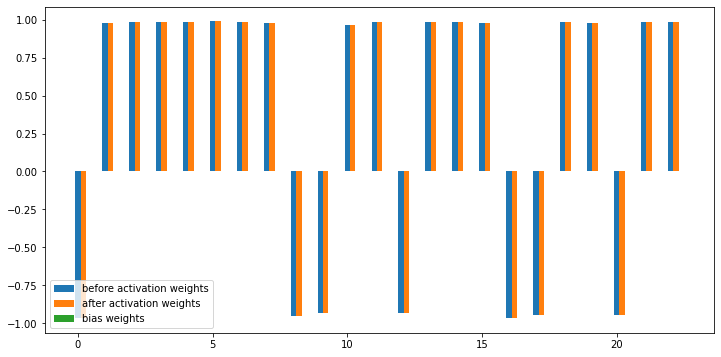

0.5906,0.3750,score:2.3915,[Ïñ¥Îäê ÏßëÏóê Í∑ÄÏó¨Ïö¥ Ïó¨Ïûê ÏïÑÍ∏∞Í∞Ä ÌÉúÏñ¥ÎÇ¨ ÏïÑÍ∏∞Îäî ÏòàÏÅòÍ≥† ÎßàÏùåÏî® ÏÜåÎÖÄÍ∞Ä ÎêòÏóà Ïñ¥ÎäêÎÇ† Î≥ëÏù¥Îì§Ïñ¥ Í∑∏Îßå Îñ†ÎÇòÍ≥† ÎßêÏïòÎã§.]
correct_grammar_score:5.2580 best_grammar_score:5.0118
Ïñ¥Îäê ÏßëÏóê Í∑ÄÏó¨Ïö¥ Ïó¨Ïûê ÏïÑÍ∏∞Í∞Ä ÌÉúÏñ¥ÎÇ¨ ÏïÑÍ∏∞Îäî ÏòàÏÅòÍ≥† ÎßàÏùåÏî® ÏÜåÎÖÄÍ∞Ä ÎêòÏóà Ïñ¥ÎäêÎÇ† Î≥ëÏù¥Îì§Ïñ¥ Í∑∏Îßå Îñ†ÎÇòÍ≥† ÎßêÏïòÎã§.
Ïñ¥Îäê ÎÇ† Ïö∞Î¶¨ ÏßëÏóê Í∑ÄÏó¨Ïö¥ Ïó¨Ïûê ÏïÑÍ∏∞Í∞Ä ÌÉúÏñ¥ÎÇ¨Í≥†, ÏïÑÍ∏∞Îäî ÏòàÏÅòÍ≥† ÎßàÏùåÏî® Ï¢ãÏùÄ ÏÜåÎÖÄÍ∞Ä ÎêòÏóàÏúºÎÇò Ïñ¥ÎäêÎÇ† Î≥ëÏù¥Îì§Ïñ¥ ÏßëÏùÑ Í∑∏Îßå Îñ†ÎÇòÍ≥† ÎßêÏïòÎã§.


('Ïñ¥Îäê ÎÇ† Ïö∞Î¶¨ ÏßëÏóê Í∑ÄÏó¨Ïö¥ Ïó¨Ïûê ÏïÑÍ∏∞Í∞Ä ÌÉúÏñ¥ÎÇ¨Í≥†, ÏïÑÍ∏∞Îäî ÏòàÏÅòÍ≥† ÎßàÏùåÏî® Ï¢ãÏùÄ ÏÜåÎÖÄÍ∞Ä ÎêòÏóàÏúºÎÇò Ïñ¥ÎäêÎÇ† Î≥ëÏù¥Îì§Ïñ¥ ÏßëÏùÑ Í∑∏Îßå Îñ†ÎÇòÍ≥† ÎßêÏïòÎã§.',
 2.3914967819455732,
 5.011844158172607)

In [109]:
txt = """
ÏòõÎÇ† Ïñ¥Îäê ÏßëÏóê Í∑ÄÏó¨Ïö¥ Ïó¨Ïûê ÏïÑÍ∏∞Í∞Ä ÌÉúÏñ¥ÎÇ¨Îã§.
ÏïÑÍ∏∞Îäî Î¨¥Îü≠Î¨¥Îü≠ ÏûêÎùºÏÑú, ÏòàÏÅòÍ≥† ÎßàÏùåÏî® Í≥†Ïö¥ ÏÜåÎÖÄÍ∞Ä ÎêòÏóàÎã§.
Í∑∏Îü¨Îçò Ïñ¥ÎäêÎÇ†, ÏÜåÎÖÄÏùò Ïñ¥Î®∏ÎãàÍ∞Ä Î≥ëÏù¥Îì§Ïñ¥ Í∑∏Îßå ÏÑ∏ÏÉÅÏùÑ Îñ†ÎÇòÍ≥† ÎßêÏïòÎã§.
"""
sam_wgan4(full_text,txt,epochs=400,display= True,retry = False)

--------------------------------------------------
ÏÑúÏÇ∞ÏãúÏùòÌöå(ÏùòÏû• ÏûÑÏû¨Í¥Ä) Í∞ÄÏ∂©Ïàú¬∑Ïù¥ÏàòÏùò ÏùòÏõêÏù¥ (ÏÇ¨)ÌïúÍµ≠ÏßÄÏó≠Ïã†Î¨∏ÌòëÌöåÏóêÏÑú ÏàòÏó¨ÌïòÎäî Ïö∞ÏàòÏùòÏ†ïÎåÄÏÉÅÏùÑ Î∞õÏïòÎã§. Í∞ÄÏ∂©Ïàú ÏùòÏõêÍ≥º Ïù¥ÏàòÏùò ÏùòÏõêÏùÄ 16Ïùº ÌåîÎ¥âÎ©¥ Ìè∞ÌÉÄÎÇò Î¶¨Ï°∞Ìä∏ÏóêÏÑú Ïó¥Î¶∞ ÌïúÍµ≠ÏßÄÏó≠Ïã†Î¨∏ÌòëÌöå ÌïòÍ≥Ñ ÏõåÌÅ¨ÏÉµÏóêÏÑú ÏßÄÏó≠ÏÇ¨Ìöå Î∞úÏ†ÑÏùÑ ÏúÑÌï¥ ÌôúÎ∞úÌïú ÏùòÏ†ïÌôúÎèôÏùÑ ÌéºÏπú Í≥µÎ°úÎ•º Ïù∏Ï†ïÎ∞õÏïÑ Ïö∞ÏàòÏùòÏ†ïÎåÄÏÉÅÏùÑ ÏàòÏÉÅÌñàÎã§.
--------------------------------------------------
0 ÏÑúÏÇ∞ÏãúÏùòÌöå(ÏùòÏû• 0.16351748504193214
1 ÏûÑÏû¨Í¥Ä) 0.07312724241271307
2 Í∞ÄÏ∂©Ïàú¬∑Ïù¥ÏàòÏùò 0.14625448482542613
3 ÏùòÏõêÏù¥ 0.0
4 (ÏÇ¨)ÌïúÍµ≠ÏßÄÏó≠Ïã†Î¨∏ÌòëÌöåÏóêÏÑú 0.0
5 ÏàòÏó¨ÌïòÎäî 0.07312724241271307
6 Ïö∞ÏàòÏùòÏ†ïÎåÄÏÉÅÏùÑ 0.0
7 Î∞õÏïò 0.0
8 Í∞ÄÏ∂©Ïàú 0.0
9 ÏùòÏõêÍ≥º 0.0
10 Ïù¥ÏàòÏùò 0.0
11 ÏùòÏõêÏùÄ 0.0
12 16Ïùº 0.0
13 ÌåîÎ¥âÎ©¥ 0.0
14 Ìè∞ÌÉÄÎÇò 0.0
15 Î¶¨Ï°∞Ìä∏ÏóêÏÑú 0.10341753799900381
16 Ïó¥Î¶∞ 0.0
17 ÌïúÍµ≠ÏßÄÏó≠Ïã†Î¨∏ÌòëÌöå 0.0
18 ÌïòÍ≥Ñ 0.0
19 ÏõåÌÅ¨ÏÉµÏóêÏÑú 0.1034

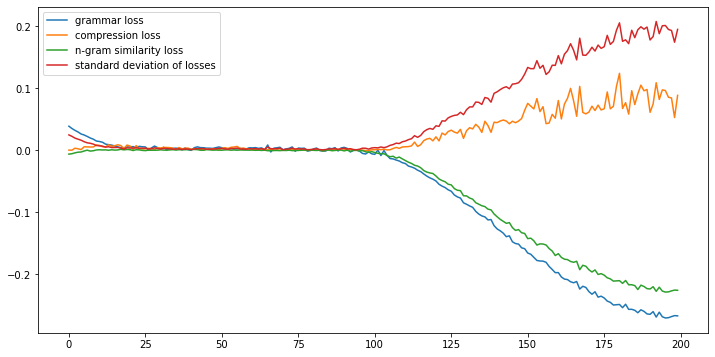

0.9229,0.0875,score:2.8032,[ÏÑúÏÇ∞ÏãúÏùòÌöå(ÏùòÏû• ÏûÑÏû¨Í¥Ä) Í∞ÄÏ∂©Ïàú¬∑Ïù¥ÏàòÏùò ÏùòÏõêÏù¥ (ÏÇ¨)ÌïúÍµ≠ÏßÄÏó≠Ïã†Î¨∏ÌòëÌöåÏóêÏÑú Ïö∞ÏàòÏùòÏ†ïÎåÄÏÉÅÏùÑ Î∞õÏïò Í∞ÄÏ∂©Ïàú ÏùòÏõêÍ≥º Ïù¥ÏàòÏùò ÏùòÏõêÏùÄ 16Ïùº ÌåîÎ¥âÎ©¥ Ìè∞ÌÉÄÎÇò Î¶¨Ï°∞Ìä∏ÏóêÏÑú Ïó¥Î¶∞ ÌïúÍµ≠ÏßÄÏó≠Ïã†Î¨∏ÌòëÌöå ÌïòÍ≥Ñ ÏõåÌÅ¨ÏÉµÏóêÏÑú ÏßÄÏó≠ÏÇ¨Ìöå Î∞úÏ†ÑÏùÑ ÏùòÏ†ïÌôúÎèôÏùÑ ÌéºÏπú Í≥µÎ°úÎ•º Ïù∏Ï†ïÎ∞õÏïÑ Ïö∞ÏàòÏùòÏ†ïÎåÄÏÉÅÏùÑ ÏàòÏÉÅÌñàÎã§.]
0.9344,0.0625,score:2.8034,[ÏÑúÏÇ∞ÏãúÏùòÌöå(ÏùòÏû• ÏûÑÏû¨Í¥Ä) Í∞ÄÏ∂©Ïàú¬∑Ïù¥ÏàòÏùò ÏùòÏõêÏù¥ (ÏÇ¨)ÌïúÍµ≠ÏßÄÏó≠Ïã†Î¨∏ÌòëÌöåÏóêÏÑú Ïö∞ÏàòÏùòÏ†ïÎåÄÏÉÅÏùÑ Î∞õÏïò Í∞ÄÏ∂©Ïàú ÏùòÏõêÍ≥º Ïù¥ÏàòÏùò ÏùòÏõêÏùÄ 16Ïùº ÌåîÎ¥âÎ©¥ Ìè∞ÌÉÄÎÇò Î¶¨Ï°∞Ìä∏ÏóêÏÑú Ïó¥Î¶∞ ÌïúÍµ≠ÏßÄÏó≠Ïã†Î¨∏ÌòëÌöå ÌïòÍ≥Ñ ÏõåÌÅ¨ÏÉµÏóêÏÑú ÏßÄÏó≠ÏÇ¨Ìöå Î∞úÏ†ÑÏùÑ ÌôúÎ∞úÌïú ÏùòÏ†ïÌôúÎèôÏùÑ ÌéºÏπú Í≥µÎ°úÎ•º Ïù∏Ï†ïÎ∞õÏïÑ Ïö∞ÏàòÏùòÏ†ïÎåÄÏÉÅÏùÑ ÏàòÏÉÅÌñàÎã§.]
correct_grammar_score:5.2540 best_grammar_score:5.2191
ÏÑúÏÇ∞ÏãúÏùòÌöå(ÏùòÏû• ÏûÑÏû¨Í¥Ä) Í∞ÄÏ∂©Ïàú¬∑Ïù¥ÏàòÏùò ÏùòÏõêÏù¥ (ÏÇ¨)ÌïúÍµ≠ÏßÄÏó≠Ïã†Î¨∏ÌòëÌöåÏóêÏÑú Ïö∞ÏàòÏùòÏ†ïÎåÄÏÉÅÏùÑ Î∞õÏïò Í∞Ä

('ÏÑúÏÇ∞ÏãúÏùòÌöå ( ÏùòÏû• ÏûÑÏû¨Í¥Ä ) ÏÜåÏÜç Í∞ÄÏ∂©Ïàú Ïù¥ÏàòÏùò ÏùòÏõêÏù¥ ( ÏÇ¨ ) ÌïúÍµ≠ÏßÄÏó≠Ïã†Î¨∏ÌòëÌöåÏóêÏÑú Ï£ºÍ¥ÄÌïòÎäî 2019ÎÖÑ Ïö∞ÏàòÏùòÏ†ïÎåÄÏÉÅÏùÑ ÏàòÏÉÅÌïòÍ≥†, ÏÑúÏÇ∞ÏãúÏùòÌöåÍ∞Ä Ï£ºÍ¥ÄÌïú 2019 ÏÑúÏÇ∞Ïãú ÏÑúÏÇ∞Ïãú Îã§Î¨∏ÌôîÍ∞ÄÏ°±ÏßÄÏõêÏÇ¨ÏóÖ ÏóêÏÑú ÏÑúÏÇ∞Ïãú ÌåîÎ¥âÎ©¥ Ìè∞ÌÉÄ.',
 2.8031978200365995,
 5.219142436981201)

In [78]:
txt = """
ÏÑúÏÇ∞ÏãúÏùòÌöå(ÏùòÏû• ÏûÑÏû¨Í¥Ä) Í∞ÄÏ∂©Ïàú¬∑Ïù¥ÏàòÏùò ÏùòÏõêÏù¥ (ÏÇ¨)ÌïúÍµ≠ÏßÄÏó≠Ïã†Î¨∏ÌòëÌöåÏóêÏÑú ÏàòÏó¨ÌïòÎäî Ïö∞ÏàòÏùòÏ†ïÎåÄÏÉÅÏùÑ Î∞õÏïòÎã§. Í∞ÄÏ∂©Ïàú ÏùòÏõêÍ≥º Ïù¥ÏàòÏùò ÏùòÏõêÏùÄ 16Ïùº ÌåîÎ¥âÎ©¥ Ìè∞ÌÉÄÎÇò Î¶¨Ï°∞Ìä∏ÏóêÏÑú Ïó¥Î¶∞ ÌïúÍµ≠ÏßÄÏó≠Ïã†Î¨∏ÌòëÌöå ÌïòÍ≥Ñ ÏõåÌÅ¨ÏÉµÏóêÏÑú ÏßÄÏó≠ÏÇ¨Ìöå Î∞úÏ†ÑÏùÑ ÏúÑÌï¥ ÌôúÎ∞úÌïú ÏùòÏ†ïÌôúÎèôÏùÑ ÌéºÏπú Í≥µÎ°úÎ•º Ïù∏Ï†ïÎ∞õÏïÑ Ïö∞ÏàòÏùòÏ†ïÎåÄÏÉÅÏùÑ ÏàòÏÉÅÌñàÎã§.
"""
sam_wgan4(txt,txt,epochs=200,display= True,retry = False)

# Sentence Corrector (EncoderDecoderModel)

In [19]:
from transformers import EncoderDecoderModel, BertTokenizerFast
import torch

pre_trained_kobert_model_name='kykim/bert-kor-base'

tokenizer = BertTokenizerFast.from_pretrained(pre_trained_kobert_model_name)

Downloading:   0%|          | 0.00/344k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/80.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/725 [00:00<?, ?B/s]

In [102]:
from transformers import EncoderDecoderModel, BertTokenizerFast
del model
model = EncoderDecoderModel.from_pretrained("/content/drive/MyDrive/GAN_ENDE/sentence_complete_model")

In [21]:
def sentence_correct(text):
    text = text.strip()
    w = text.split(' ')
    last_token = w[len(w)-1][:-1]
    inputs = tokenizer(text, padding="max_length", truncation=True, max_length=128, return_tensors="pt")
    input_ids = inputs.input_ids.to(device)
    attention_mask = inputs.attention_mask.to(device)
    '''
    v = torch.sum(attention_mask[0]).item()
    c = random.sample([i for i in range(v)],int(v/2))
    print(c)
    #input_ids[0][c] = 0
    attention_mask[0][c] = 0 #random.random()
    attention_mask[0][0] = 1
    attention_mask[0][v-1] = 1
    
    print(input_ids)    
    print(attention_mask)
    '''
    model.to(device)
    model.eval()
    outputs = model.generate(input_ids, attention_mask=attention_mask).cpu().detach().numpy()[0]
    o=[]
    for token in outputs:
        if token == tokenizer.pad_token_id:
            break
        o.append(token)
    output_str = tokenizer.batch_decode([o], skip_special_tokens=True)[0]
    #print('raw',output_str)
    eos = output_str.find('.')
    real_eos =  eos
    if last_token.endswith('Îã§'):
        eos2 = output_str.find(last_token) 
        if eos2 > 0 and eos2 < eos:
            real_eos = eos2 + len(last_token)
    output_str = output_str[0:real_eos] + '.'
    return output_str

In [24]:
sentence_correct('ÏïÑÍ∏∞Í∞Ä ÌÉúÏñ¥ÎÇ¨Í≥† ÏïÑÎ≤ÑÏßÄÎäî ÌôÄÎ°ú Í±±Ï†ïÎêòÏóà ÏÉàÏñ¥Î®∏ÎãàÎ•º ÎßûÏù¥Ìñà ÏÉàÏñ¥Î®∏ÎãàÏôÄ Ïñ∏ÎãàÎì§ÏùÄ ÏÑ±ÏßàÏù¥ ÏïÑÏ£º Ïã¨Ïà†ÏüÅÏù¥Îì§Ïù¥Ïóà Ïù¥Î≤àÏóêÎäî ÏïÑÎ≤ÑÏßÄÎßàÏ†Ä ÎèåÏïÑÍ∞ÄÏÖ® ÏôïÍ∂ÅÏóêÏÑú Î¨¥ÎèÑÌöåÍ∞Ä Ïó¥Î†∏Îã§.')

'ÏïÑÍ∏∞ ÏïÑÍ∏∞Í∞Ä ÌÉúÏñ¥ÎÇ¨Í≥†, ÏïÑÎ≤ÑÏßÄÎäî ÌôÄÎ°ú Í±±Ï†ïÎêòÏóàÍ≥†, ÏÉàÏñ¥Î®∏ÎãàÎ•º ÎßûÏù¥ÌñàÏßÄÎßå, ÏÉà Ïñ¥Î®∏ÎãàÏôÄ Ïñ∏ÎãàÎì§ÏùÄ ÏÑ±ÏßàÏù¥ ÏïÑÏ£º Ïã¨Ìïú Ïã¨Ïà†ÏüÅÏù¥Îì§Ïù¥ÏóàÍ≥†, Ïù¥Î≤àÏóêÎäî ÏïÑÎ≤ÑÏßÄÎßàÏ†Ä ÎèåÏïÑÍ∞ÄÏÖ®ÏúºÎ©∞, ÏôïÍ∂ÅÏóêÏÑú Î¨¥ÎèÑÌöåÍ∞Ä Ïó¥Î†∏Îã§.'

In [ ]:
txt = 'ÏòõÎÇ† Í∑ÄÏó¨Ïö¥ Ïó¨Ïûê ÏïÑÍ∏∞Í∞Ä ÌÉúÏñ¥ÎÇ¨ ÎßàÏùåÏî® ÏÜåÎÖÄÍ∞Ä ÎêòÏóàÎã§.'
w = txt.split(' ')
last_token = w[len(w)-1]
last_token[:-1]

'ÎêòÏóàÎã§'

In [110]:
full_text = """
ÏòõÎÇ† Ïñ¥Îäê ÏßëÏóê Í∑ÄÏó¨Ïö¥ Ïó¨Ïûê ÏïÑÍ∏∞Í∞Ä ÌÉúÏñ¥ÎÇ¨Îã§.
ÏïÑÍ∏∞Îäî Î¨¥Îü≠Î¨¥Îü≠ ÏûêÎùºÏÑú, ÏòàÏÅòÍ≥† ÎßàÏùåÏî® Í≥†Ïö¥ ÏÜåÎÖÄÍ∞Ä ÎêòÏóàÎã§.
Í∑∏Îü¨Îçò Ïñ¥ÎäêÎÇ†, ÏÜåÎÖÄÏùò Ïñ¥Î®∏ÎãàÍ∞Ä Î≥ëÏù¥Îì§Ïñ¥ Í∑∏Îßå ÏÑ∏ÏÉÅÏùÑ Îñ†ÎÇòÍ≥† ÎßêÏïòÎã§.
ÏÜåÎÖÄÏùò ÏïÑÎ≤ÑÏßÄÎäî ÌôÄÎ°ú ÎÇ®ÏùÄ ÏÜåÎÖÄÍ∞Ä Í±±Ï†ïÎêòÏóàÎã§.
Í∑∏ÎûòÏÑú ÏñºÎßà ÏßÄÎÇòÏÑú ÏÉàÏñ¥Î®∏ÎãàÎ•º ÎßûÏù¥ÌñàÎã§.
ÏÉàÏñ¥Î®∏ÎãàÎäî ÏÜåÎÖÄÎ≥¥Îã§ ÎÇòÏù¥Í∞Ä ÏúÑÏù∏ ÎëêÎ™ÖÏùò Îî∏ÏùÑ Îç∞Î¶¨Í≥† ÏôîÎã§.
Í∑∏Îü¨ÎÇò ÏÉàÏñ¥Î®∏ÎãàÏôÄ Ïñ∏ÎãàÎì§ÏùÄ ÏÑ±ÏßàÏù¥ Í≥†ÏïΩÌïú Ïã¨Ïà†ÏüÅÏù¥Îì§Ïù¥ÏóàÎã§.
ÏÉàÏñ¥Î®∏ÎãàÎäî ÏÜåÎÖÄÍ∞Ä ÏûêÍ∏∞ Îî∏Îì§Î≥¥Îã§ ÏòàÏÅòÍ≥† Ï∞©ÌïúÍ≤å Î™ªÎßàÎïÖÌñàÎã§.
Í∑∏Îü∞Îç∞ Ïù¥Î≤àÏóêÎäî ÏïÑÎ≤ÑÏßÄÎßàÏ†Ä ÎèåÏïÑÍ∞ÄÏÖ®Îã§.
ÏÜåÎÖÄÎäî Ïì∏Í≥†, Îã¶Í≥†, ÌïòÎÖÄÏ≤òÎüº ÌïòÎ£® Ï¢ÖÏùº ÏßëÏïàÏùºÏùÑ ÎèÑÎß°ÏïÑ ÌñàÎã§.
ÏßëÏïàÏùºÏù¥ ÌûòÎì§Ïñ¥ ÏßÄÏπ†ÎïåÎ©¥ ÎÇúÎ°ØÍ∞ÄÏóê ÏïâÏïÑÏÑú Ïû†Ïãú Ïâ¨Í≥§ ÌñàÎã§.
Í∑∏Îü¨Îçò Ïñ¥ÎäêÎÇ†, ÏôïÍ∂ÅÏóêÏÑú Î¨¥ÎèÑÌöåÍ∞Ä Ïó¥Î†∏Îã§.
Ïã†Îç∞Î†êÎùºÏùò ÏßëÏóêÎèÑ Î¨¥ÎèÑÌöå Ï¥àÎåÄÏû•Ïù¥ ÏôîÎã§.
ÏÉàÏñ¥Î®∏ÎãàÎäî Ïñ∏ÎãàÎì§ÏùÑ Îç∞Î¶¨Í≥† Î¨¥ÎèÑÌöåÏû•ÏúºÎ°ú Îñ†ÎÇ¨Îã§.
Ïã†Îç∞Î†êÎùºÎèÑ Î¨¥ÎèÑÌöåÏóê Í∞ÄÍ≥† Ïã∂ÏóàÎã§.
ÌòºÏûê ÎÇ®ÏùÄ Ïã†Îç∞Î†êÎùºÎäî ÌõåÏ©çÌõåÏ©ç Ïö∏Í∏∞ ÏãúÏûëÌñàÎã§.
Í∑∏Îïå Ïñ¥ÎîîÏÑ†Í∞Ä ÎßàÎ≤ïÏÇ¨ Ìï†Î®∏ÎãàÍ∞Ä ÎÇòÌÉÄÎÇ¨Îã§.
Ïã†Îç∞Î†êÎùºÍ∞Ä Í≥†Í∞úÎ•º Îì§Ïñ¥Î≥¥Îãà, ÎßàÎ≤ïÏÇ¨ Ìï†Î®∏ÎãàÍ∞Ä ÎπôÍ∑∏Î†à ÏõÉÍ≥† ÏûàÏóàÎã§.
Ìï†Î®∏ÎãàÎäî ÏÜåÎÖÄÎ•º Î¨¥ÎèÑÌöåÏóê Î≥¥ÎÇ¥Ï§ÑÌÖåÎãà Ìò∏Î∞ï ÌïúÍ∞úÏôÄ ÏÉùÏ•ê ÎëêÎßàÎ¶¨, ÎèÑÎßàÎ±ÄÏùÑ Í∞ÄÏßÄÍ≥† Ïò§Îùº ÌñàÎã§.
ÎßàÎ≤ïÏÇ¨ Ìï†Î®∏ÎãàÍ∞Ä Ïù¥Í≤ÉÎì§ÏùÑ Î≥¥Î©¥ÏÑú Ï£ºÎ¨∏ÏùÑ Ïô∏Ïõ†Îã§.
Í∑∏Î¶¨Í≥† ÏßÄÌå°Ïù¥Î°ú Ìò∏Î∞ïÏùÑ Í±¥ÎìúÎ¶¨Ïûê, Ìò∏Î∞ïÏù¥ ÌôîÎ†§Ìïú Ìô©Í∏àÎßàÏ∞®Î°ú Î≥ÄÌñàÎã§.
Ïù¥Î≤àÏóêÎäî ÏÉùÏ•êÏôÄ ÎèÑÎßàÎ±ÄÏùÑ Í±¥ÎìúÎ†∏Îã§.
Í∑∏Îû¨ÎçîÎãà ÏÉùÏ•êÎäî Ìù∞ÎßêÎ°ú, ÎèÑÎßàÎ±ÄÏùÄ Î©ãÏßÑ ÎßàÎ∂ÄÎ°ú Î≥ÄÌñàÎã§.
Ïã†Îç∞Î†êÎùºÏùò ÎÇ°ÏùÄ Ïò∑ÏùÄ Íµ¨Ïä¨ Ïû•ÏãùÏù¥ Î∞òÏßùÏù¥Îäî ÏòàÏÅú ÎìúÎ†àÏä§Î°ú Î∞îÎÄåÏóàÎã§.
Ìï†Î®∏ÎãàÎäî Ïã†Îç∞Î†êÎùºÏóêÍ≤å Î∞òÏßùÎ∞òÏßù ÎπõÎÇòÎäî Ïú†Î¶¨Íµ¨ÎëêÎ•º Ïã†Í≤® Ï£ºÏóàÎã§.
Í∑∏Î¶¨Í≥† Î∞§ Ïó¥ÎëêÏãúÍ∞Ä ÎêòÎ©¥ Î™®Îì†Í≤å Ï≤òÏùåÎåÄÎ°ú ÎèåÏïÑÍ∞ÑÎã§Í≥† ÏïåÎ†§Ï£ºÏóàÎã§.
Ìô©Í∏àÎßàÏ∞®Îäî Ìò∏Î∞ïÏúºÎ°ú, Ìù∞ÎßêÏùÄ ÏÉùÏ•êÎ°ú, ÎßàÎ∂ÄÎäî ÎèÑÎßàÎ±ÄÏúºÎ°ú Î≥ÄÌïòÍ≤å ÎêúÎã§.
Í∑∏Îü¨ÎãàÍπå Î∞òÎìúÏãú Î∞§ Ïó¥ÎëêÏãúÍ∞Ä ÎêòÍ∏∞ Ï†ÑÏóê ÎèåÏïÑÏôÄÏïº ÌïúÎã§.
Ïã†Îç∞Î†êÎùºÎäî Ìô©Í∏àÎßàÏ∞®Î•º ÌÉÄÍ≥† ÏôïÍ∂Å Î¨¥ÎèÑÌöåÏû•ÏúºÎ°ú Í∞ÄÏÑú Î©ãÏßÑ ÏôïÏûêÎãòÏùÑ ÎßåÎÇ¨Îã§.
ÏôïÏûêÎãòÎèÑ ÏïÑÎ¶ÑÎã§Ïö¥ Ïã†Îç∞Î†êÎùºÏóêÍ≤å ÎßàÏùåÏùÑ ÎπºÏïòÍ≤ºÎã§.
ÏôïÏûêÎãòÏùÄ Î¨¥ÎèÑÌöåÏû•Ïóê Î™®Ïù∏ Îã§Î•∏ ÏïÑÍ∞ÄÏî®Îì§ÏùÄ Ï≥êÎã§Î≥¥ÏßÄÎèÑ ÏïäÍ≥† Ïã†Îç∞Î†êÎùºÌïòÍ≥†Îßå Ï∂§ÏùÑ Ï∂îÏóàÎã§.
Ïã†Îç∞Î†êÎùºÎäî ÏôïÏûêÎãòÍ≥º Ï∂§ÏùÑ Ï∂îÎäêÎùº ÏãúÍ∞Ñ Í∞ÄÎäî Ï§ÑÎèÑ Î™∞ÎûêÎã§.
Ïñ¥ÎäêÎçß ÏãúÍ∞ÑÏù¥ ÌùòÎü¨ Ïó¥ÎëêÏãúÍ∞Ä ÎêòÏóàÎã§. 
Î≤ΩÏãúÍ≥ÑÏùò Ïó¥ÎëêÏãúÎ•º ÏïåÎ¶¨Îäî Ï¢ÖÏÜåÎ¶¨Ïóê Ïã†Îç∞Î†êÎùºÎäî ÌôîÎì§Ïßù ÎÜÄÎûêÎã§.
Ïã†Îç∞Î†êÎùºÍ∞Ä ÌóàÎë•ÏßÄÎë• ÏôïÍ∂ÅÏùÑ Îπ†Ï†∏ÎÇòÍ∞ÄÎäîÎç∞, Ïú†Î¶¨Íµ¨Îëê ÌïúÏßùÏù¥ Î≤óÍ≤®Ï°åÎã§.
ÌïòÏßÄÎßå Íµ¨ÎëêÎ•º Ï£ºÏö∏ ÏãúÍ∞ÑÏù¥ ÏóÜÏóàÎã§.
Ïã†Îç∞Î†êÎùºÎ•º Îõ∞Ï´ìÏïÑÏò§Îçò ÏôïÏûêÎãòÏùÄ Ï∏µÍ≥ÑÏóêÏÑú Ïú†Î¶¨Íµ¨Îëê ÌïúÏßùÏùÑ Ï£ºÏõ†Îã§.
ÏôïÏûêÎãòÏùÄ Ïú†Î¶¨Íµ¨ÎëêÏùò Ï£ºÏù∏Í≥º Í≤∞ÌòºÌïòÍ∏∞Î°ú Í≤∞Ïã¨ÌñàÎã§.
Í∑∏ÎûòÏÑú Ïã†ÌïòÎì§ÏùÄ Ïú†Î¶¨Íµ¨ÎëêÏùò Ï£ºÏù∏ÏùÑ Ï∞æÏïÑ Ïò® ÎÇòÎùºÎ•º ÎèåÏïÑÎã§ÎÖîÎã§.
ÎìúÎîîÏñ¥ Ïã†Îç∞Î†êÎùºÏùò ÏßëÏóêÍπåÏßÄ Ïã†ÌïòÎì§Ïù¥ ÎèÑÏ∞©ÌñàÎã§.
Ïñ∏ÎãàÎì§ÏùÄ Î∞úÏùÑ Ïò§ÎØÄÎ†§ÎèÑ Î≥¥Í≥†, Íµ¨ÎëêÎ•º ÎäòÎ†§ÎèÑ Î≥¥ÏïòÏßÄÎßå ÌïúÎààÏóê Î≥¥Í∏∞ÏóêÎèÑ Ïú†Î¶¨Íµ¨ÎëêÎäî ÎÑàÎ¨¥ ÏûëÏïòÎã§.
Í∑∏Îïå Ïã†Îç∞Î†êÎùºÍ∞Ä Ï°∞Ïö©Ìûà Îã§Í∞ÄÏôÄ ÏûêÍ∏∞ÎèÑ ÌïúÎ≤à Ïã†Ïñ¥Î≥¥Í≤å Ìï¥Îã¨ÎùºÍ≥† Î∂ÄÌÉÅÌñàÎã§.
Ïã†Îç∞Î†êÎùºÎäî Ïã†ÌïòÏóêÍ≤åÏÑú Î∞õÏùÄ Ïú†Î¶¨Íµ¨ÎëêÎ•º Ïã†ÏóàÎã§.
Ïú†Î¶¨Íµ¨ÎëêÎäî Ïã†Îç∞Î†êÎùºÏùò Î∞úÏóê Íº≠ ÎßûÏïòÎã§.
Ïã†ÌïòÎì§ÏùÄ Ïã†Îç∞Î†êÎùºÎ•º ÏôïÍ∂ÅÏúºÎ°ú Îç∞Î¶¨Í≥† Í∞îÎã§.
Í∑∏ Îí§ Ïã†Îç∞Î†êÎùºÎäî ÏôïÏûêÎãòÍ≥º Í≤∞ÌòºÌïòÏó¨ Ïò§ÎûòÏò§Îûò ÌñâÎ≥µÌïòÍ≤å ÏÇ¥ÏïòÎã§.
"""

In [98]:
full_text="""
Íµ≠Ï±ÖÏó∞Íµ¨Í∏∞Í¥ÄÏù∏ Î≥¥Í±¥ÏÇ¨ÌöåÏó∞Íµ¨ÏõêÏù¥ Í∑∏Ï†ú Î∞±ÌôîÏ†êÏãù Ï†ÄÏ∂úÏÇ∞ ÎåÄÏ±ÖÏùÑ ÌÜµÌèêÌï©ÌïòÍ≥† Í¥ÄÎ†® ÏòàÏÇ∞ÎèÑ ÏùºÎ∂Ä ÏÇ≠Í∞êÌï¥Ïïº ÌïúÎã§Îäî ÏßÄÏ†ÅÏùÑ ÎÇ¥ÎÜ®Îã§.
Ï†ïÎ∂ÄÏôÄ ÏßÄÎ∞©ÏûêÏπòÎã®Ï≤¥Îì§Ïù¥ ÏãúÌñâ Ï§ëÏù∏ Ï†ÄÏ∂úÏÇ∞ÎåÄÏ±ÖÏù¥ 190 Í∞úÏóê Ïù¥Î•∏Îã§Îäî ÎÇ¥Ïö©Î∂ÄÌÑ∞ ÎààÍ∏∏ÏùÑ ÎÅàÎã§.
Ïó∞Íµ¨ÏõêÏùÄ Ïù¥ Í∞ÄÏö¥Îç∞ ÏÉÅÎãπÏàòÍ∞Ä Ï§ëÎ≥µ¬∑Ïú†ÏÇ¨ÎåÄÏ±ÖÏù¥ÎùºÎ©∞ 90 Ïó¨ Í∞úÎ•º ÏóÜÏï® Í≤ÉÏùÑ Ï†úÏïàÌñàÎã§.
ÏòàÏÇ∞ÎÇ≠ÎπÑÎ•º Ï§ÑÏù¥Í≥† Ï†ïÏ±Ö Ìö®Ïú®ÏùÑ ÎÜíÏù¥ÎùºÎäî Ï∑®ÏßÄÎã§.
Ï†ÄÏ∂úÏÇ∞ ÎåÄÏ±ÖÏùÄ ÎåÄÌëúÏ†ÅÏù∏ 'Í≥†ÎπÑÏö©¬∑Î¨¥(ÁÑ°)Ìö®Ïú®' ÎåÄÏ±ÖÏúºÎ°ú ÌèâÍ∞ÄÎ∞õÍ≥† ÏûàÎã§.
ÏµúÍ∑º 12 ÎÖÑÍ∞Ñ 122 Ï°∞8000 ÏñµÏõêÏùò Ïû¨Ï†ïÏùÑ ÏèüÏïÑÎ∂ÄÏóàÏßÄÎßå Ï∂úÏÇ∞Ïú®ÏùÄ ÏÑ∏Í≥Ñ ÏµúÏ†ÄÏàòÏ§ÄÏù¥Îã§.
Ï∂úÏÇ∞Ïû•Î†§Í∏à, ÏñëÏú°ÏàòÎãπ Í∞ôÏùÄ ÎπÑÏö© ÏßÄÏõê ÏúÑÏ£ºÏùò Îã®Í∏∞ Ï≤òÎ∞©Ïóê Í∏âÍ∏âÌïú ÌÉìÏù¥Îã§.
Ïù∏Íµ¨ Ï†ïÏ†ê(5296 Îßå Î™Ö)Ïóê ÎèÑÎã¨ÌïòÎäî ÏãúÍ∏∞ÎèÑ 2031 ÎÖÑÏóêÏÑú 2027 ÎÖÑÏúºÎ°ú 4 ÎÖÑ ÏïûÎãπÍ≤®Ïßà ÌåêÏù¥Îã§.
Ïù∏Íµ¨ Ïû¨Ïïô Ï∂©Í≤©ÏùÑ ÏµúÏÜåÌôîÌïòÎ†§Î©¥ Ïû¨Ï†ï Ìà¨ÏûÖÏóê ÏùòÏ°¥ÌïòÎäî Í∏∞Ï°¥ Î∞©ÏãùÏóêÏÑú Î≤óÏñ¥ÎÇò 'Íµ≠Í∞Ä ÎåÄÍ≥Ñ' Ï∞®ÏõêÏùò Ï¢ÖÌï©Ï†ÅÏù∏ ÎåÄÏ±ÖÏù¥ ÌïÑÏöîÌïòÎã§.
Ï†ïÎ∂ÄÎäî Ï†ÄÏ∂úÏÇ∞ ÎåÄÏ±Ö Íµ¨Ï°∞Ï°∞Ï†ïÏùò Î¨ºÍº¨Î•º Ìä∏Îäî Í≤ÉÏùÑ Í≥ÑÍ∏∞Î°ú Í¥ÄÎ†® Ï†ïÏ±ÖÏùÑ Í≥ºÍ∞êÌûà Î∞îÍøîÏïº Ìï† Í≤ÉÏù¥Îã§.
Ï†ÄÏ∂úÏÇ∞ ÎåÄÏ±ÖÏùÑ Î≥¥Îã§ ÎÑìÏùÄ Í∞úÎÖêÏùò 'Ïù∏Íµ¨ Ï†ïÏ±Ö'ÏúºÎ°ú Ï†ÑÌôòÌï¥Ïïº ÌïúÎã§Îäî Ï£ºÏû•ÎèÑ ÏßÑÏßÄÌïòÍ≤å ÏÉàÍ≤®Î¥ÑÏßÅ ÌïòÎã§.
ÎÇúÏûÑ ÏπòÎ£å ÏßÄÏõê, Íµ≠ÎÇ¥ ÏûÖÏñë ÌôúÏÑ±Ìôî, ÎπÑÌòºÍ∞ÄÏ†ï ÏûêÎÖÄ ÏñëÏú° ÏßÄÏõê Îì± Îçî Ï†ïÍµêÌïú Ïù∏Íµ¨ ÎåÄÏ±ÖÏùÑ ÏàòÎ¶ΩÌï¥Ïïº ÌïúÎã§Îäî Í≤ÉÏù¥Îã§.
ÏùºÎ≥∏ Îì± Ï£ºÏöî ÏÑ†ÏßÑÍµ≠Ï≤òÎüº Í≥†Í∏â Í∏∞Ïà†Ïù∏Î†•Ïóê Î¨∏Ìò∏Î•º ÌôïÎåÄÌïòÎäî Îì± Ïù¥ÎØºÏ†ïÏ±ÖÎèÑ Ï†ÑÌñ•Ï†ÅÏúºÎ°ú Î∞îÍøÄ ÌïÑÏöîÍ∞Ä ÏûàÎã§.
Í∑∏Îü∞ Ï†êÏóêÏÑú Î¨¥ÏóáÎ≥¥Îã§ÎèÑ ÎåÄÌïúÎØºÍµ≠ÏùÑ 'Îß§Î†• ÏûàÍ≥†, ÏÇ¥Í≥† Ïã∂ÏùÄ ÎÇòÎùº'Î°ú ÎßåÎìúÎäî Í≤ÉÏù¥ Ï§ëÏöîÌïòÎã§.
Í∞úÏù∏Ïùò ÏûêÏú†ÏôÄ Ï∞ΩÏùòÍ∞Ä Î≥¥Ïû•ÎêòÍ≥†, ÏÇ¨ÏóÖÌïòÍ∏∞ Ï¢ãÏùÄ ÎÇòÎùºÍ∞Ä ÎêúÎã§Î©¥ Í≥†Í∏â Ïù∏Î†•Ïùò ÌïúÍµ≠ Ïú†ÏûÖÏù¥ Í∞ÄÏÜçÌôîÎê† Í≤ÉÏù¥Îã§.
ÏÉùÏÇ∞ Í∞ÄÎä•Ïù∏Íµ¨Í∞Ä Ïù¥ÎØ∏ Ï§ÑÏñ¥Îì§Í∏∞ ÏãúÏûëÌñàÎã§Îäî Ï†êÏóêÏÑú Ï†ÄÏ∂úÏÇ∞ ÎåÄÏ±ÖÏùò Íµ¨Ï°∞Ï°∞Ï†ï Î™ªÏßÄÏïäÍ≤å Î∞úÏÉÅ Ï†ÑÌôòÏù¥ ÏãúÍ∏âÌïòÎã§.
"""

In [ ]:
!pip3 install bert-extractive-summarizer

In [26]:
def besm(full_text,text,top_rank=2):

    queries = nltk.sent_tokenize(text)
    src_sentences = nltk.sent_tokenize(full_text)
    query_embeddings = s_discriminator._embedder.encode(queries,show_progress_bar=False)
    full_text_embeddings = s_discriminator._embedder.encode(src_sentences,show_progress_bar=False)
    #print(queries)
    #print(org_text_emb)
    
    if len(query_embeddings) == 0:
        return 0.0

    cos_scores = scipy.spatial.distance.cdist(query_embeddings, full_text_embeddings, "cosine")
    scores = np.max(cos_scores,axis=1)
    orderd = [(o,s) for o,s in enumerate(scores)]
    orderd.sort(key=lambda e: e[1],reverse=True)
    a = [orderd[i][0] for i in range(0,top_rank)]
    a.sort()
    summ_text = " ".join([queries[i] for i in a])

    return summ_text


In [61]:
def besm2(full_text,text,top_rank=2):
    scores = []
    queries = nltk.sent_tokenize(text)
    for sen in queries:
        s = cosine_similarity(sen,full_text)
        scores.append(s)
        print(s,sen)
    orderd = [(o,s) for o,s in enumerate(scores)]
    orderd.sort(key=lambda e: e[1],reverse=True)
    a = [orderd[i][0] for i in range(0,top_rank)]
    a.sort()
    summ_text = " ".join([queries[i] for i in a])

    return summ_text


In [62]:
test_text = """
ÏÉàÏñ¥Î®∏ÎãàÎäî ÏÜåÎÖÄÎ≥¥Îã§ ÎÇòÏù¥Í∞Ä ÏúÑÏù∏ ÎëêÎ™ÖÏùò Îî∏ÏùÑ Îç∞Î¶¨Í≥† ÏôîÎã§.
Í∑∏Îü¨ÎÇò ÏÉàÏñ¥Î®∏ÎãàÏôÄ Ïñ∏ÎãàÎì§ÏùÄ ÏÑ±ÏßàÏù¥ Í≥†ÏïΩÌïú Ïã¨Ïà†ÏüÅÏù¥Îì§Ïù¥ÏóàÎã§.
ÏÉàÏñ¥Î®∏ÎãàÎäî ÏÜåÎÖÄÍ∞Ä ÏûêÍ∏∞ Îî∏Îì§Î≥¥Îã§ ÏòàÏÅòÍ≥† Ï∞©ÌïúÍ≤å Î™ªÎßàÎïÖÌñàÎã§.
Í∑∏Îü∞Îç∞ Ïù¥Î≤àÏóêÎäî ÏïÑÎ≤ÑÏßÄÎßàÏ†Ä ÎèåÏïÑÍ∞ÄÏÖ®Îã§.
"""
besm2(full_text,test_text)

0.16738525020849007 
ÏÉàÏñ¥Î®∏ÎãàÎäî ÏÜåÎÖÄÎ≥¥Îã§ ÎÇòÏù¥Í∞Ä ÏúÑÏù∏ ÎëêÎ™ÖÏùò Îî∏ÏùÑ Îç∞Î¶¨Í≥† ÏôîÎã§.
0.1211371061769273 Í∑∏Îü¨ÎÇò ÏÉàÏñ¥Î®∏ÎãàÏôÄ Ïñ∏ÎãàÎì§ÏùÄ ÏÑ±ÏßàÏù¥ Í≥†ÏïΩÌïú Ïã¨Ïà†ÏüÅÏù¥Îì§Ïù¥ÏóàÎã§.
0.16042481628836316 ÏÉàÏñ¥Î®∏ÎãàÎäî ÏÜåÎÖÄÍ∞Ä ÏûêÍ∏∞ Îî∏Îì§Î≥¥Îã§ ÏòàÏÅòÍ≥† Ï∞©ÌïúÍ≤å Î™ªÎßàÎïÖÌñàÎã§.
0.08726850010014817 Í∑∏Îü∞Îç∞ Ïù¥Î≤àÏóêÎäî ÏïÑÎ≤ÑÏßÄÎßàÏ†Ä ÎèåÏïÑÍ∞ÄÏÖ®Îã§.


'\nÏÉàÏñ¥Î®∏ÎãàÎäî ÏÜåÎÖÄÎ≥¥Îã§ ÎÇòÏù¥Í∞Ä ÏúÑÏù∏ ÎëêÎ™ÖÏùò Îî∏ÏùÑ Îç∞Î¶¨Í≥† ÏôîÎã§. ÏÉàÏñ¥Î®∏ÎãàÎäî ÏÜåÎÖÄÍ∞Ä ÏûêÍ∏∞ Îî∏Îì§Î≥¥Îã§ ÏòàÏÅòÍ≥† Ï∞©ÌïúÍ≤å Î™ªÎßàÎïÖÌñàÎã§.'

In [63]:
def summary(ft,text,steps=4,top_rank=2):
    org_sentences = np.array(nltk.sent_tokenize(text.strip()))
    summary_text = []
    for i in range(0,len(org_sentences),steps):
        txt = ''
        cnt = 0
        for s in range(i,i+steps):
            if s < len(org_sentences):
                txt +=  ' ' + org_sentences[s]
                cnt +=1
        #print(cnt,top_rank)
        txt = txt.strip()
        if cnt > top_rank:
            txt = besm2(ft,txt,top_rank=top_rank)

        t,score, grammar = sam_wgan4(ft,txt.strip(),epochs=400,display=True)
        print('-'*50)
        print(t,score,grammar)
        #t = sentence_correct(t)
        #print(t)
        summary_text.append(t)

    return ' '.join(summary_text).strip()

0.08269624881408116 ÏòõÎÇ† Ïñ¥Îäê ÏßëÏóê Í∑ÄÏó¨Ïö¥ Ïó¨Ïûê ÏïÑÍ∏∞Í∞Ä ÌÉúÏñ¥ÎÇ¨Îã§.
0.12875788477576158 ÏïÑÍ∏∞Îäî Î¨¥Îü≠Î¨¥Îü≠ ÏûêÎùºÏÑú, ÏòàÏÅòÍ≥† ÎßàÏùåÏî® Í≥†Ïö¥ ÏÜåÎÖÄÍ∞Ä ÎêòÏóàÎã§.
0.13410746744579805 Í∑∏Îü¨Îçò Ïñ¥ÎäêÎÇ†, ÏÜåÎÖÄÏùò Ïñ¥Î®∏ÎãàÍ∞Ä Î≥ëÏù¥Îì§Ïñ¥ Í∑∏Îßå ÏÑ∏ÏÉÅÏùÑ Îñ†ÎÇòÍ≥† ÎßêÏïòÎã§.
0.11652653241984165 ÏÜåÎÖÄÏùò ÏïÑÎ≤ÑÏßÄÎäî ÌôÄÎ°ú ÎÇ®ÏùÄ ÏÜåÎÖÄÍ∞Ä Í±±Ï†ïÎêòÏóàÎã§.
0.10112014361568664 Í∑∏ÎûòÏÑú ÏñºÎßà ÏßÄÎÇòÏÑú ÏÉàÏñ¥Î®∏ÎãàÎ•º ÎßûÏù¥ÌñàÎã§.
0.16042481628836316 ÏÉàÏñ¥Î®∏ÎãàÎäî ÏÜåÎÖÄÎ≥¥Îã§ ÎÇòÏù¥Í∞Ä ÏúÑÏù∏ ÎëêÎ™ÖÏùò Îî∏ÏùÑ Îç∞Î¶¨Í≥† ÏôîÎã§.
--------------------------------------------------
ÏïÑÍ∏∞Îäî Î¨¥Îü≠Î¨¥Îü≠ ÏûêÎùºÏÑú ÏòàÏÅòÍ≥† ÎßàÏùåÏî® Í≥†Ïö¥ ÏÜåÎÖÄÍ∞Ä ÎêòÏóàÎã§. Í∑∏Îü¨Îçò Ïñ¥ÎäêÎÇ† ÏÜåÎÖÄÏùò Ïñ¥Î®∏ÎãàÍ∞Ä Î≥ëÏù¥Îì§Ïñ¥ Í∑∏Îßå ÏÑ∏ÏÉÅÏùÑ Îñ†ÎÇòÍ≥† ÎßêÏïòÎã§. ÏÉàÏñ¥Î®∏ÎãàÎäî ÏÜåÎÖÄÎ≥¥Îã§ ÎÇòÏù¥Í∞Ä ÏúÑÏù∏ ÎëêÎ™ÖÏùò Îî∏ÏùÑ Îç∞Î¶¨Í≥† ÏôîÎã§.
--------------------------------------------------
0 ÏïÑÍ∏∞Îäî 0.0
1 Î¨¥Îü≠Î¨¥Îü≠ 0.01695889903687727
2 ÏûêÎùºÏÑú 0.0
3 ÏòàÏÅòÍ≥† 0.

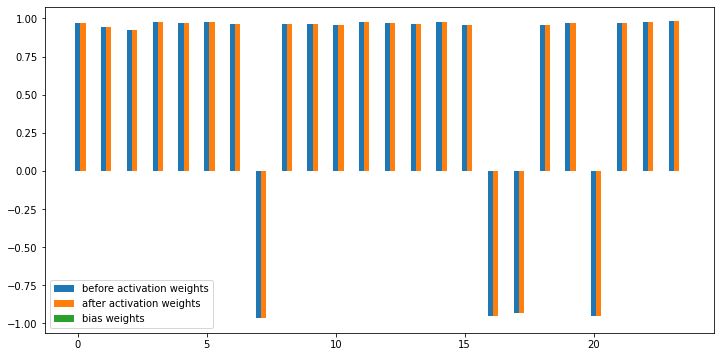

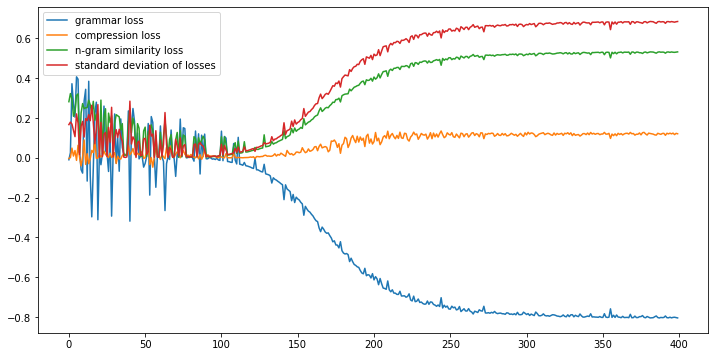

0.7789,0.2524,score:2.6691,[ÏïÑÍ∏∞Îäî Î¨¥Îü≠Î¨¥Îü≠ ÏûêÎùºÏÑú ÏòàÏÅòÍ≥† ÎßàÏùåÏî® Í≥†Ïö¥ ÏÜåÎÖÄÍ∞Ä Ïñ¥ÎäêÎÇ† ÏÜåÎÖÄÏùò Ïñ¥Î®∏ÎãàÍ∞Ä Î≥ëÏù¥Îì§Ïñ¥ Í∑∏Îßå ÏÑ∏ÏÉÅÏùÑ Îñ†ÎÇòÍ≥† ÎßêÏïò ÎÇòÏù¥Í∞Ä ÏúÑÏù∏ Îî∏ÏùÑ Îç∞Î¶¨Í≥† ÏôîÎã§.]
correct_grammar_score:5.2656 best_grammar_score:5.1536
ÏïÑÍ∏∞Îäî Î¨¥Îü≠Î¨¥Îü≠ ÏûêÎùºÏÑú ÏòàÏÅòÍ≥† ÎßàÏùåÏî® Í≥†Ïö¥ ÏÜåÎÖÄÍ∞Ä Ïñ¥ÎäêÎÇ† ÏÜåÎÖÄÏùò Ïñ¥Î®∏ÎãàÍ∞Ä Î≥ëÏù¥Îì§Ïñ¥ Í∑∏Îßå ÏÑ∏ÏÉÅÏùÑ Îñ†ÎÇòÍ≥† ÎßêÏïò ÎÇòÏù¥Í∞Ä ÏúÑÏù∏ Îî∏ÏùÑ Îç∞Î¶¨Í≥† ÏôîÎã§.
ÏïÑÍ∏∞Îäî Î¨¥Îü≠Î¨¥Îü≠ ÏûêÎùºÏÑú ÏòàÏÅòÍ≥† ÎßàÏùåÏî® Í≥†Ïö¥ ÏÜåÎÖÄÍ∞Ä ÎêêÏßÄÎßå, Ïñ¥ÎäêÎÇ† ÏÜåÎÖÄÏùò Ïñ¥Î®∏ÎãàÍ∞Ä Î≥ëÏù¥Îì§Ïñ¥ Í∑∏Îßå ÏÑ∏ÏÉÅÏùÑ Îñ†ÎÇòÍ≥† ÎßêÏïòÍ≥†, Í∑∏ ÏÜåÎÖÄÎäî ÎÇòÏù¥Í∞Ä ÏÑ∏ ÏÑ∏Ïù∏ Ïñ¥Î¶∞ Îî∏ÏùÑ Îç∞Î¶¨Í≥† ÏßëÏùÑ ÎÇòÏÑ∞Îã§Í∞Ä ÏïÑÏù¥Î•º Îç∞Î¶¨Í≥† ÏôîÎã§.
--------------------------------------------------
ÏïÑÍ∏∞Îäî Î¨¥Îü≠Î¨¥Îü≠ ÏûêÎùºÏÑú ÏòàÏÅòÍ≥† ÎßàÏùåÏî® Í≥†Ïö¥ ÏÜåÎÖÄÍ∞Ä ÎêêÏßÄÎßå, Ïñ¥ÎäêÎÇ† ÏÜåÎÖÄÏùò Ïñ¥Î®∏ÎãàÍ∞Ä Î≥ëÏù¥Îì§Ïñ¥ Í∑∏Îßå ÏÑ∏ÏÉÅÏùÑ Îñ†ÎÇòÍ≥† ÎßêÏïòÍ≥†, Í∑∏ ÏÜåÎÖÄÎäî ÎÇòÏù¥Í∞Ä ÏÑ∏ ÏÑ∏Ïù∏ Ïñ¥Î¶∞ Îî

In [ ]:
import io

for try_count in range(100):

    org_text = summary(full_text,full_text,steps=6,top_rank=3)
    print('='*50)
    for txt in np.array(nltk.sent_tokenize(org_text.strip())):
        print(txt)
    org_text = summary(full_text,org_text,steps=2,top_rank=2)
    print('='*50 + str(try_count+1) + '='*50)
    for txt in np.array(nltk.sent_tokenize(org_text.strip())):
        print(txt)

    with io.open('/content/drive/MyDrive/GAN_ENDE/Cinderella_summary_result.txt','a',encoding='utf8') as f:
        f.write(org_text + '\r\n')
    f.close()
    

In [ ]:
model.save_pretrained("/content/drive/MyDrive/GAN_ENDE/sentence_complete_model1")